# **Project Name**    - Bank Marketing Effectiveness Prediction- Classification Project 



##### **Project Type**    - Classification
##### **Contribution**    - Individual
##### **Team Member 1 -** Arumugam Balasuadhakar

# **Project Summary -**


1.	The given dataset is from direct marketing campaigns of a Portuguese banking institution. The campaigns were conducted by phone calls. The classification goal is to predict if the client will subscribe a term deposit or not.
2.	The following model were build such as Logistic Regression, Decision Tree,  K nearest Neighbour Classifier and Naive Bayes Algorithm and compared them using the evaluation metrics score.
3.	The project started with importing and understanding the dataset by observing the rows and columns, shape, info about the data types, statistical description about the numerical columns and counting the null values of each column.
4.	The null values  are checked  and replaced with suitable values and averages and made the columns ready for Exploratory Data Analysis.
5.	 EDA  performed by various Univarite, Bivariate and Multivariate analysis to get the idea of the dataset and to make necessary transformations and manipulations to be then used for data pre processing for modelling and also gain business insights from them.
6.	Some of the hypothesis test were performed and based on p values the decision of accepted/rejected the  null hypothesis. 
7.	In the feature engineering section feature manipulation was done  where some columns were dropped and missing values imputations were done. The outliers are handled by using Z score method. Categorical features are converted into  numerical features by using  One Hot encoding.
8.	For splitting the data the Train test split was used  and splitted the data into 80:20.The data imbalance was adjusted using SMOTE technique. Furthermore the scaling process of data was done. The important features were selected for modeling .After apply each model hyper parameter tuning was used to find best optimized parameters.
9.	 The following metric scores were used to  such as Confusion matrix, Accuracy, Precision, Recall, F1 Score ,Cohens Kappa Score and ROC-AUC Curve.
10.	The Logistic Regression model performs better than other models. The Proposed Logistic Regression model have the Accuracy: 81.6 %, Precision :83.86 %, Recall: 78.26 %, F1 Score : 80.96 %, Cohens Kappa Score : 63.2 % and Area Under Curve : 89.98 %. Which are more compared to aforementioned other models.
11.	It is concluded that proposed model is capable to predict the target variables using new dataset and the model will be used for business improvement in banking sectors. 







# **GitHub Link -**

https://github.com/balasuadhakar/Bank-Marketing-Effectiveness-Prediction-Classification-Project

# **Problem Statement**


The dataset is associated to direct marketing campaigns of a Portuguese banking institution. The phone calls were used for marketing campaigns. Often, more than one contact to the same client was required, in order to assess if the product (bank term deposit) would be ('yes') or not ('no') subscribed. The classification goal is to predict if the client will subscribe to a term deposit (variable y).





# **General Guidelines** : -  

1.   Well-structured, formatted, and commented code is required. 
2.   Exception Handling, Production Grade Code & Deployment Ready Code will be a plus. Those students will be awarded some additional credits. 
     
     The additional credits will have advantages over other students during Star Student selection.
       
             [ Note: - Deployment Ready Code is defined as, the whole .ipynb notebook should be executable in one go
                       without a single error logged. ]

3.   Each and every logic should have proper comments.
4. You may add as many number of charts you want. Make Sure for each and every chart the following format should be answered.
        

```
# Chart visualization code
```
            

*   Why did you pick the specific chart?
*   What is/are the insight(s) found from the chart?
* Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

5. You have to create at least 15 logical & meaningful charts having important insights.


[ Hints : - Do the Vizualization in  a structured way while following "UBM" Rule. 

U - Univariate Analysis,

B - Bivariate Analysis (Numerical - Categorical, Numerical - Numerical, Categorical - Categorical)

M - Multivariate Analysis
 ]





6. You may add more ml algorithms for model creation. Make sure for each and every algorithm, the following format should be answered.


*   Explain the ML Model used and it's performance using Evaluation metric Score Chart.


*   Cross- Validation & Hyperparameter Tuning

*   Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

*   Explain each evaluation metric's indication towards business and the business impact pf the ML model used.




















# ***Let's Begin !***

## ***1. Know Your Data***

### Import Libraries

In [3]:
# Import Libraries
import numpy as np
import pandas as pd
from numpy import math
import plotly.express as px
from numpy import loadtxt
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from matplotlib import rcParams

import numpy as np
import seaborn as sns
from scipy.stats import *
import math

from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_auc_score
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics
from sklearn.metrics import roc_curve
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.tree import export_graphviz
from sklearn.metrics import log_loss
from sklearn.inspection import permutation_importance

import warnings
warnings.filterwarnings('ignore')

### Dataset Loading

In [4]:
# Mounting the google drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [5]:
# Load Dataset
df = pd.read_csv('/content/drive/MyDrive/csv file/Machine Learning csv files/bank-full.csv', sep = ";")

### Dataset First View

In [6]:
# Dataset First Look
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


### Dataset Rows & Columns count

In [7]:
# Dataset Rows & Columns count
print(f' The Dataset contains total {df.shape[0]} rows and {df.shape[1]} columns.')

 The Dataset contains total 45211 rows and 17 columns.


### Dataset Information

In [8]:
# Dataset Info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome   45211 non-null  object
 16  y          45211 non-null  object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB


#### Duplicate Values

In [9]:
# Dataset Duplicate Value Count
duplicated_value_count=len(df[df.duplicated()])
print("The total number of duplicate values in the dataset is = ",duplicated_value_count)

The total number of duplicate values in the dataset is =  0


#### Missing Values/Null Values

In [10]:
# Missing Values/Null Values Count
df.isnull().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
y            0
dtype: int64

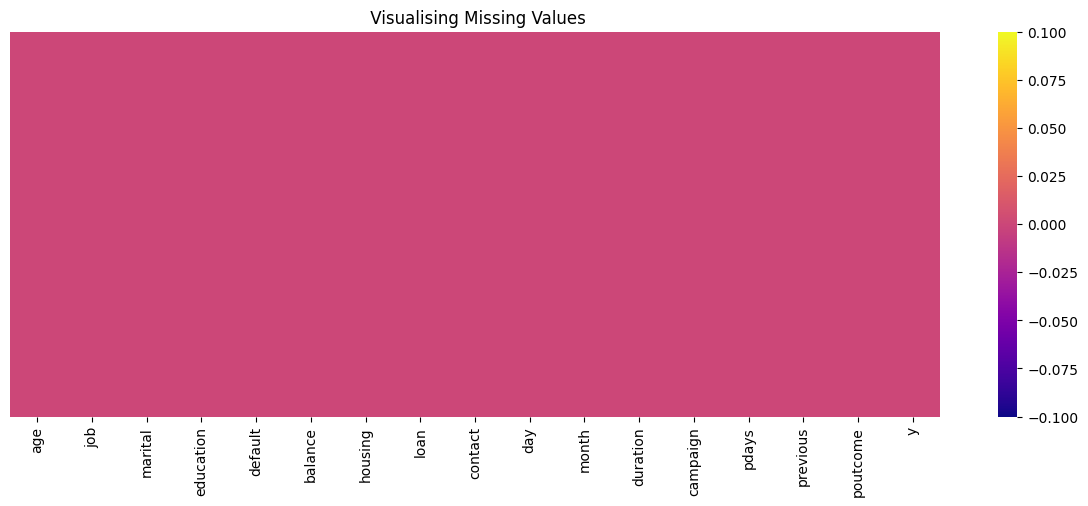

In [11]:
# Visualizing the missing values
plt.figure(figsize=(15,5))
sns.heatmap(df.isnull(),cmap='plasma',annot=False,yticklabels=False)
plt.title(" Visualising Missing Values");

### What did you know about your dataset?

The Dataset contains total 45211 rows and 17 columns. There are no dublicate values and null values in the dataset.

## ***2. Understanding Your Variables***

In [12]:
# Dataset Columns
df.columns

Index(['age', 'job', 'marital', 'education', 'default', 'balance', 'housing',
       'loan', 'contact', 'day', 'month', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'y'],
      dtype='object')

In [13]:
# Dataset Describe
df.describe()

,age,balance,day,duration,campaign,pdays,previous
count,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000
mean,40.936210,1362.272058,15.806419,258.163080,2.763841,40.197828,0.580323
std,10.618762,3044.765829,8.322476,257.527812,3.098021,100.128746,2.303441
min,18.000000,-8019.000000,1.000000,0.000000,1.000000,-1.000000,0.000000
25%,33.000000,72.000000,8.000000,103.000000,1.000000,-1.000000,0.000000
50%,39.000000,448.000000,16.000000,180.000000,2.000000,-1.000000,0.000000
75%,48.000000,1428.000000,21.000000,319.000000,3.000000,-1.000000,0.000000
max,95.000000,102127.000000,31.000000,4918.000000,63.000000,871.000000,275.000000


### Variables Description 


### <b>Customers details: </b>
*   age (numeric)
*  job : type of job (categorical: admin, blue-collar, entrepreneur, housemaid,management, retired, self-employed, services, student, technician, unemployed, unknown)
*  marital : marital status (categorical: divorced, married, single, unknown; note: 'divorced' means divorced or widowed)
*  education (categorical:high.school, illiterate, professional.course, university.degree, unknown)
*  default: has credit in default? (categorical: no, yes, unknown)
*  housing: has housing loan? (categorical: no, yes, unknown)
*  loan: has personal loan? (categorical: no, yes, unknown)

### <b> Related with the last contact of the current campaign:</b>
*  contact: contact communication type (categorical: cellular,telephone)
*  month: last contact month of year (categorical: jan, feb, mar, april, may,june, july, aug, sep, oct, nov, dec)
*  duration: last contact duration, in seconds (numeric). Important note: this attribute highly affects the output target (e.g., if duration = 0 then y ='no'). Yet, the duration is not known before a call is performed. Also, after the end of the call y is obviously known. Thus, this input should only be included for benchmark purposes and should be discarded if the intention is to have a realistic predictive model.

### <b>Other attributes: </b>
*  campaign: number of contacts performed during this campaign and for this client (numeric, includes last contact)
*  pdays: number of days that passed by after the client was last contacted from a previous campaign (numeric; 999 means client was not previously contacted)
*  previous: number of contacts performed before this campaign and for this client (numeric)
*  poutcome: outcome of the previous marketing campaign (categorical: failure, nonexistent, success)


### <b>Output variable (desired target):</b>
*  y - has the client subscribed a term deposit? (binary: 'yes', 'no')

### Check Unique Values for each variable.

In [14]:
#Extracting categorical features
categorical_features= df.select_dtypes(include='object')

In [15]:
# Check Unique Values for each variable.
for i in categorical_features:
   print(" %s" % i,sep = '\n')
   print(df[i].value_counts())
   print("-"*20)

 job
blue-collar      9732
management       9458
technician       7597
admin.           5171
services         4154
retired          2264
self-employed    1579
entrepreneur     1487
unemployed       1303
housemaid        1240
student           938
unknown           288
Name: job, dtype: int64
--------------------
 marital
married     27214
single      12790
divorced     5207
Name: marital, dtype: int64
--------------------
 education
secondary    23202
tertiary     13301
primary       6851
unknown       1857
Name: education, dtype: int64
--------------------
 default
no     44396
yes      815
Name: default, dtype: int64
--------------------
 housing
yes    25130
no     20081
Name: housing, dtype: int64
--------------------
 loan
no     37967
yes     7244
Name: loan, dtype: int64
--------------------
 contact
cellular     29285
unknown      13020
telephone     2906
Name: contact, dtype: int64
--------------------
 month
may    13766
jul     6895
aug     6247
jun     5341
nov     3970
apr

## 3. ***Data Wrangling***

### Data Wrangling Code

In [16]:
# Write your code to make your dataset analysis ready.
#Extracting continous features
continuous_features = ['age', 'balance', 'day', 'duration', 'campaign', 'previous']

### What all manipulations have you done and insights you found?



*   The features have been splitted in continous features and categorical features

*   In the data set there are 45211 rows and 17 columns.

*   Data does not contain any missing values.
*   Data does not cointain any duplicate value as well.
*   Data conitains 10 categorical columns.
*   And remainings are numerical i.e 7.


## ***4. Data Vizualization, Storytelling & Experimenting with charts : Understand the relationships between variables***

#### Chart - 1

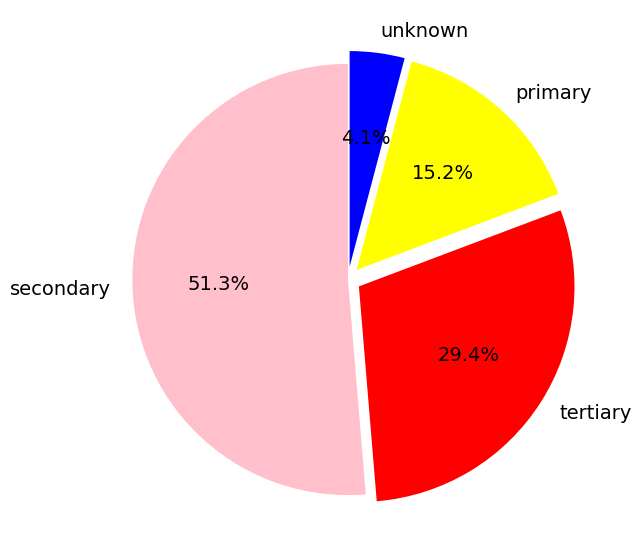

In [17]:
# Chart - 1 visualization code of Education of customers
plt.rcParams['figure.figsize'] = 7,7
labels = df['education'].value_counts().index.tolist()
sizes = df['education'].value_counts().tolist()
explode = (0, 0.06,0.06,0.06)
colors = ['pink', 'red', 'yellow','blue']
plt.pie(sizes, explode=explode, labels=labels, colors=colors, autopct='%1.1f%%',startangle=90, textprops={'fontsize': 14})
plt.show()

##### 1. Why did you pick the specific chart?

To identify the education level of the clients.

##### 2. What is/are the insight(s) found from the chart?

most of the customers education are secondary and teritary.

##### 3. Will the gained insights help creating a positive business impact? 

Are there any insights that lead to negative growth? Justify with specific reason.

Secondary and teritary education customer are more so easily they can understand the scheme.

#### Chart - 2

[Text(0.5, 1.0, 'Count of job categories')]

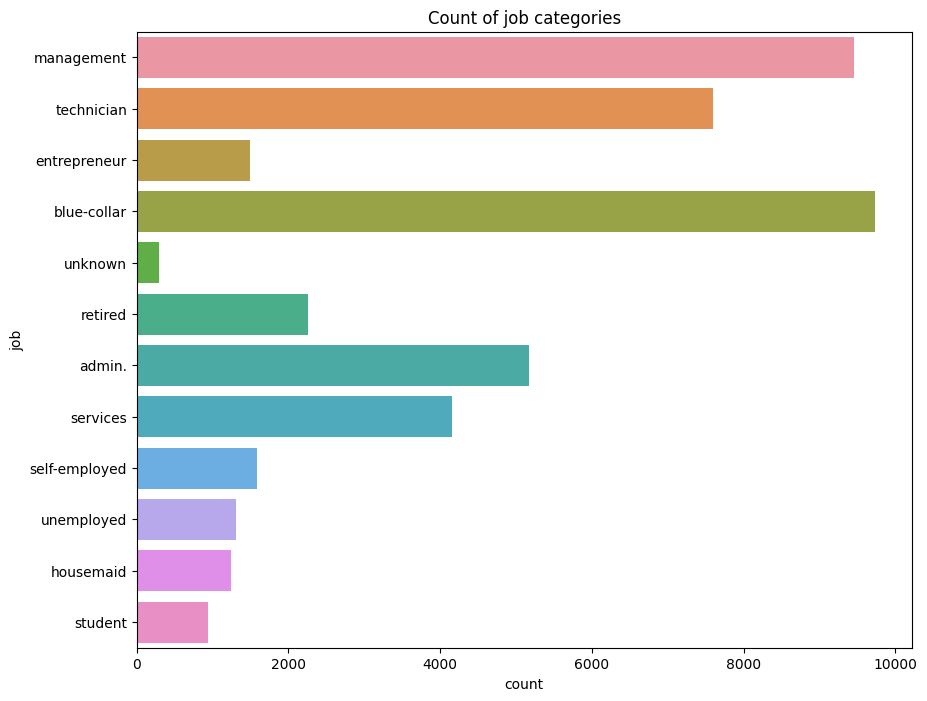

In [18]:
# Chart - 2 visualization code for job category of customers
fig,ax=plt.subplots(figsize=(10,8))
sns.countplot(data=df,y='job',)
ax.set(title='Count of job categories')

##### 1. Why did you pick the specific chart?

To find out the job category of the customers.

##### 2. What is/are the insight(s) found from the chart?

Most of the customers job categories are blue color, management and technician.

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Based on three major job categories of customers bank can plan new sceme of term deposit.

#### Chart - 3

[Text(0.5, 1.0, 'Total of each marital categories')]

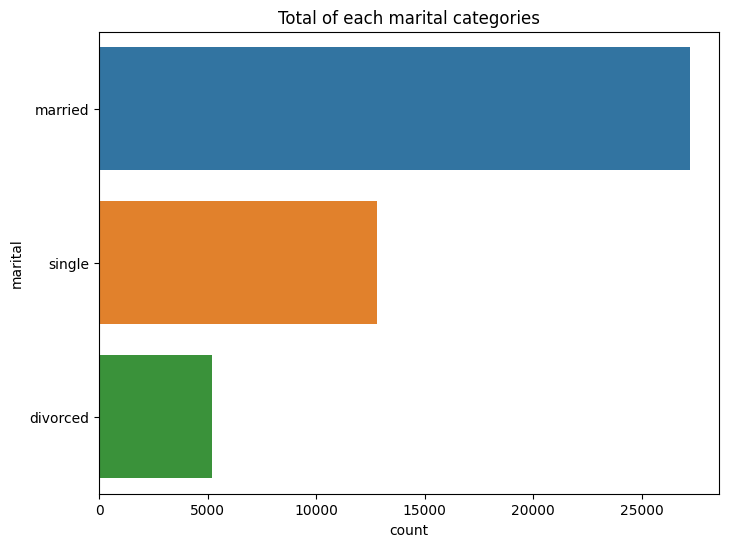

In [19]:
# Chart - 3 visualization code of maritial status of the customers
fig,ax=plt.subplots(figsize=(8,6))
sns.countplot(data=df,y='marital',)
ax.set(title='Total of each marital categories')

##### 1. Why did you pick the specific chart?

To find out the maritial status of the customers.

##### 2. What is/are the insight(s) found from the chart?

Most of the customers are married.

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Married customers are majority so bank can plan for term deposite of their wife also.

#### Chart - 4

[Text(0.5, 1.0, 'Campaign on each months')]

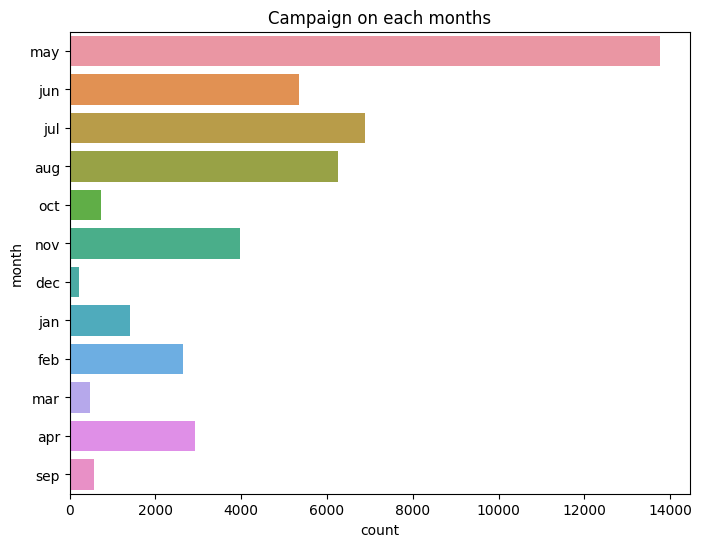

In [20]:
# Chart - 4 visualization code of campaign on each months
fig,ax=plt.subplots(figsize=(8,6))
sns.countplot(data=df,y='month',)
ax.set(title='Campaign on each months')

##### 1. Why did you pick the specific chart?

To find number of campaign conducted on each months.

##### 2. What is/are the insight(s) found from the chart?

May,June, July months campaign are more and december, march, september months very low campaign

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

December,march, september months low campaign can be increased by some offers.

#### Chart - 5

[Text(0.5, 1.0, 'Mode of contact to the customers')]

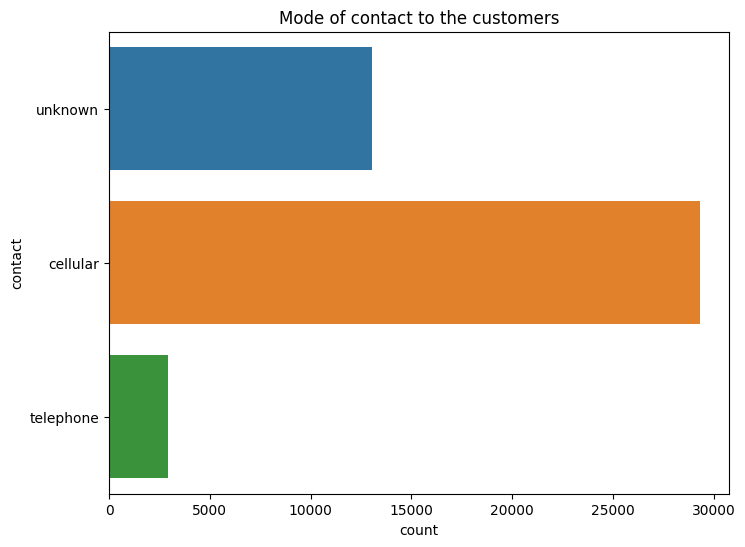

In [21]:
# Chart - 5 visualization code of contact mode of customers
fig,ax=plt.subplots(figsize=(8,6))
sns.countplot(data=df,y='contact',)
ax.set(title='Mode of contact to the customers')

##### 1. Why did you pick the specific chart?

To find the mode of contact to the customers.

##### 2. What is/are the insight(s) found from the chart?

Most of the customer contact done by cellular mode.

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Most of the customers are contacted by cellular mode, so bank can plan contacting customers cellular mode.

#### Chart - 6

[Text(0.5, 1.0, 'Outcome of the Campaign ')]

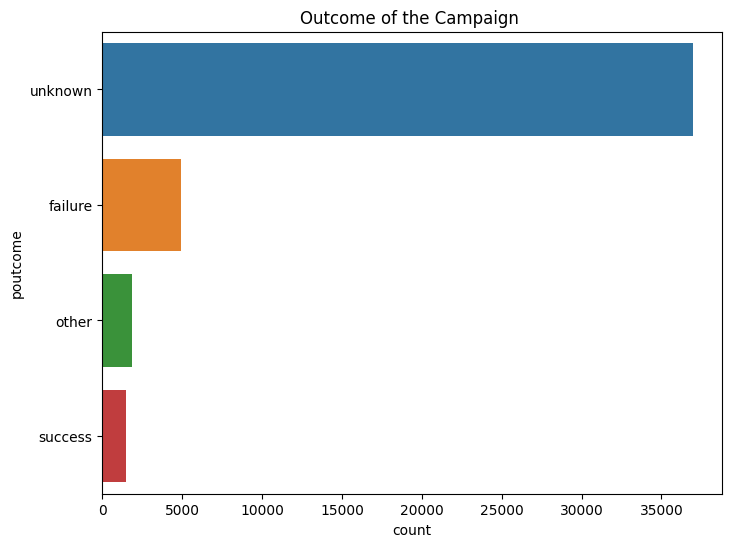

In [22]:
# Chart - 6 visualization code of Outcome of the campaign
fig,ax=plt.subplots(figsize=(8,6))
sns.countplot(data=df,y='poutcome',)
ax.set(title='Outcome of the Campaign ')

##### 1. Why did you pick the specific chart?

To find the outcome of the campaign.

##### 2. What is/are the insight(s) found from the chart?

Most of the outcomes are unknown category and very few success.

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

The unknown category of the outcome need to analyse by the bank and the outcome may useful for increasing sucess rate.

#### Chart - 7

[Text(0.5, 1.0, 'Personal loan taken by the customers')]

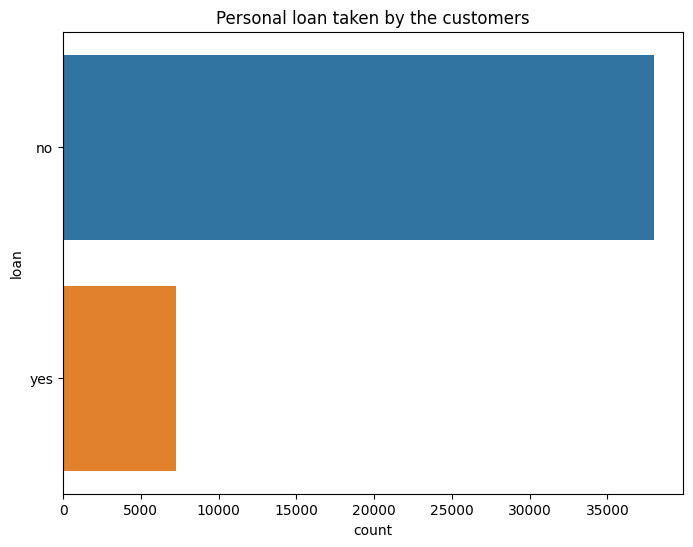

In [23]:
# Chart - 7 visualization code of personal loan taken by the customers
fig,ax=plt.subplots(figsize=(8,6))
sns.countplot(data=df,y='loan',)
ax.set(title='Personal loan taken by the customers')

##### 1. Why did you pick the specific chart?

To findout the personal loan category of the customers.

##### 2. What is/are the insight(s) found from the chart?

Most of the customers not having personal loan.

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Bank they can increase the personal loan by marketing and eligible customers they can give personal loan.

#### Chart - 8

<Axes: title={'center': 'Housing loan taken by the customers'}, ylabel='housing'>

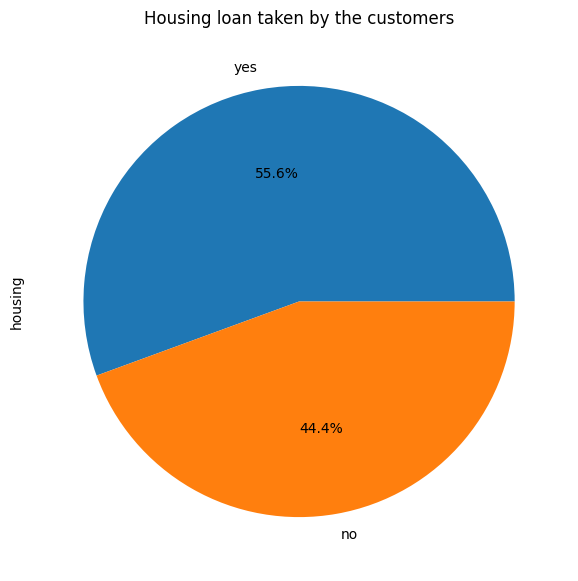

In [24]:
# Chart - 8 visualization code housing loan taken by the customers
df['housing'].value_counts().plot(kind='pie',title="Housing loan taken by the customers",autopct='%1.1f%%')

##### 1. Why did you pick the specific chart?

To find the housing loan status of the customers.

##### 2. What is/are the insight(s) found from the chart?

55.6 % customers have the housing loan and 44.4 % customers not having housing loan.

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

44.4 % customers customers can be identified and marketted for term deposite or personal loan or housing loan.

#### Chart - 9

<Axes: title={'center': 'Customers has credit in default'}, ylabel='default'>

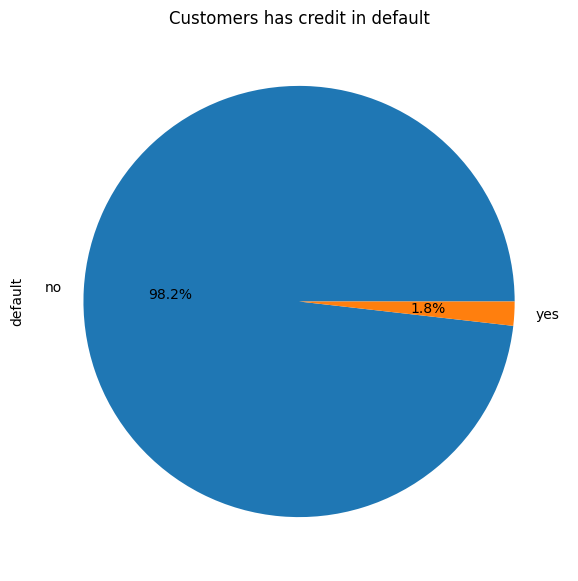

In [25]:
# Chart - 9 visualization code of credit of the customers
df['default'].value_counts().plot(kind='pie',title="Customers has credit in default",autopct='%1.1f%%')

##### 1. Why did you pick the specific chart?

To check the credit status of the customers.

##### 2. What is/are the insight(s) found from the chart?

98.2 % customers not having credit.

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

From 98.2 %  not having credit eligible customers can be identified and they will be convinced for term deposit or housing loan or personal loan.

#### Chart - 10

[Text(0.5, 1.0, 'Number of times contact were performed for campaign')]

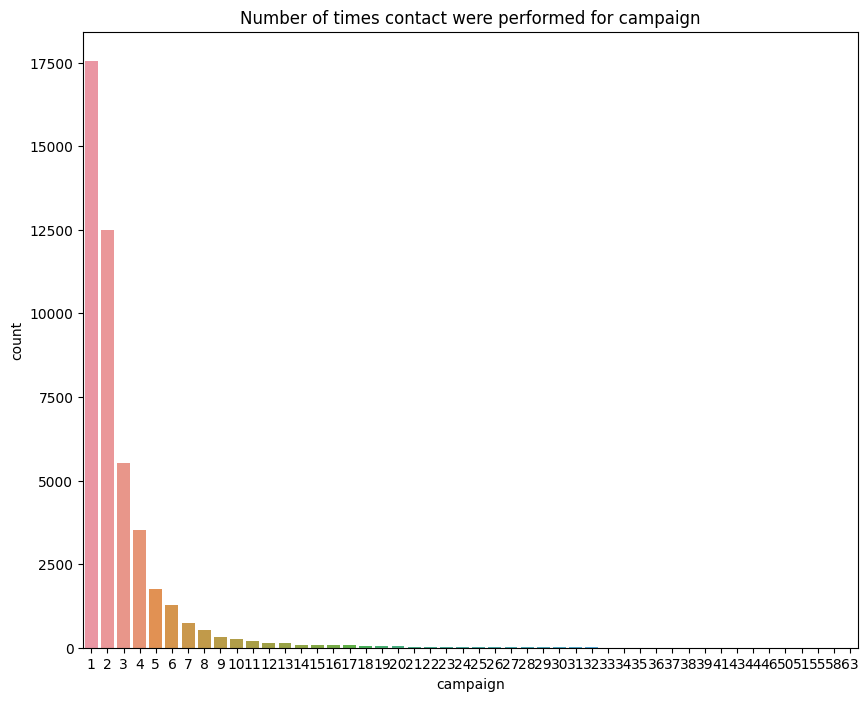

In [26]:
# Chart - 10 visualization code of number of contact were performed for campaign
fig,ax=plt.subplots(figsize=(10,8))
sns.countplot(data=df,x='campaign',)
ax.set(title='Number of times contact were performed for campaign')

##### 1. Why did you pick the specific chart?

To find how many times customers were contacted in campaign.

##### 2. What is/are the insight(s) found from the chart?

Most of the contacts were performed first and second time.

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Bank employee they can keep ready for all information to first contact of the customers.

#### Chart - 11

[Text(0.5, 1.0, 'Number of contacts performed before this campaign and for this client')]

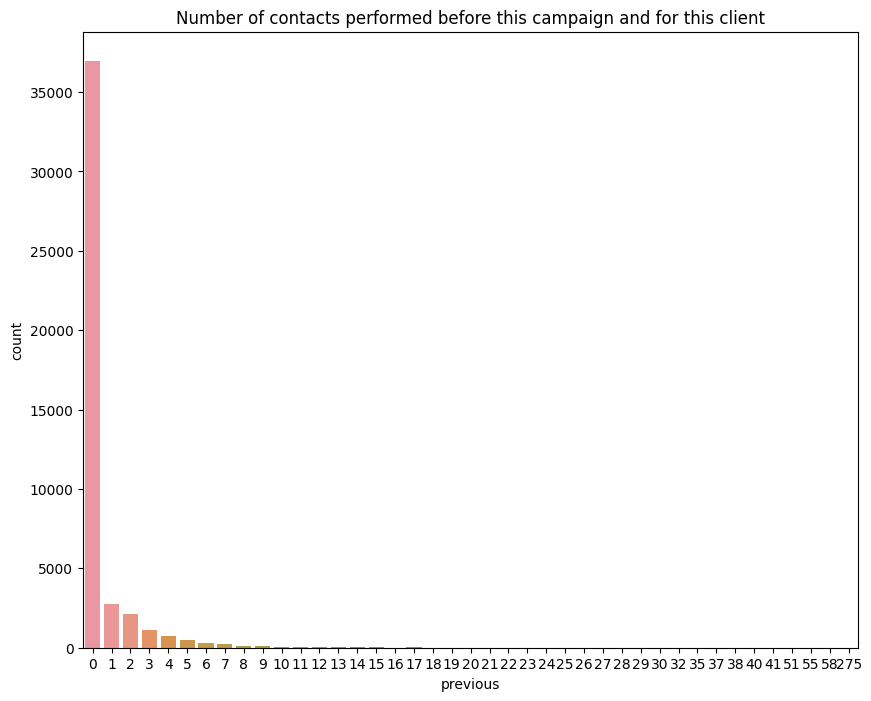

In [27]:
# Chart - 11 visualization code of Number of contacts performed before this campaign and for this client
fig,ax=plt.subplots(figsize=(10,8))
sns.countplot(data=df,x='previous',)
ax.set(title='Number of contacts performed before this campaign and for this client')

##### 1. Why did you pick the specific chart?

To check the number of contacts performed before this campaign and for this client

##### 2. What is/are the insight(s) found from the chart?

most of the customers not contacted before the campaign.

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Before campaign most of the customers are not contacted.During campaign only they contacted first time.Bank employee they can keep ready all the positive pionts about the term deposit to attract them in first time.

#### Chart - 12

<Axes: title={'center': 'Term deposit subscriped by the clients'}, ylabel='y'>

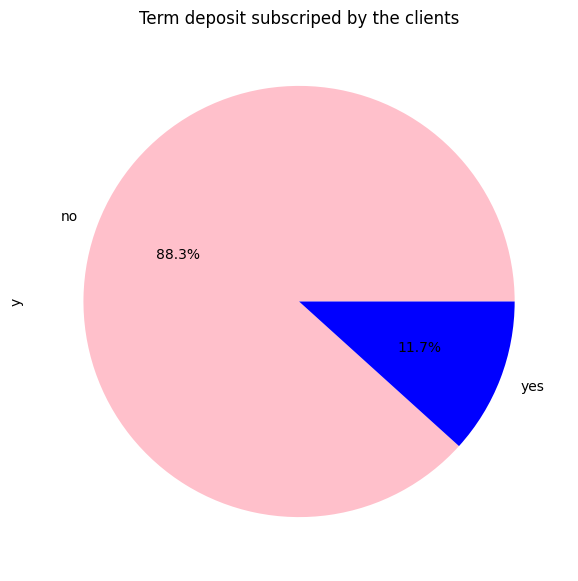

In [28]:
# Chart - 12 visualization code of Term deposit subscriped by the clients
colors=['pink','blue']
df['y'].value_counts().plot(kind='pie',title="Term deposit subscriped by the clients",colors=colors ,autopct='%1.1f%%')

##### 1. Why did you pick the specific chart?

To find how many percnt term deposit subcribed by the clients.

##### 2. What is/are the insight(s) found from the chart?

11.7 % clients only subscribed the term deposit remaining 88.3% not subcribed.

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

88.3 % clients not subcribed the term deposit, bank can analyse the reasons by surveying them and they can improve it.

#### Chart - 13

In [29]:
# Chart - 13 visualization code of Checking the distribution of campign with respect to duration column
fig = px.scatter(df, x="campaign", y="duration", color="y",title='Distribution of campign with respect to duration column')
fig.show()

##### 1. Why did you pick the specific chart?

To check the correlation between the campaign and duration.

##### 2. What is/are the insight(s) found from the chart?

Clients interseted in initial duration of calls, they had higher probability in making a deposit Duration of calls faded as the time period of campaign extended further There were many positive leads in the initial days of campaign.


##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

peoples were intest at the initial duration of campaign.Delay in the campaign clients are not intrested.

#### Chart - 14 - Correlation Heatmap

<Axes: >

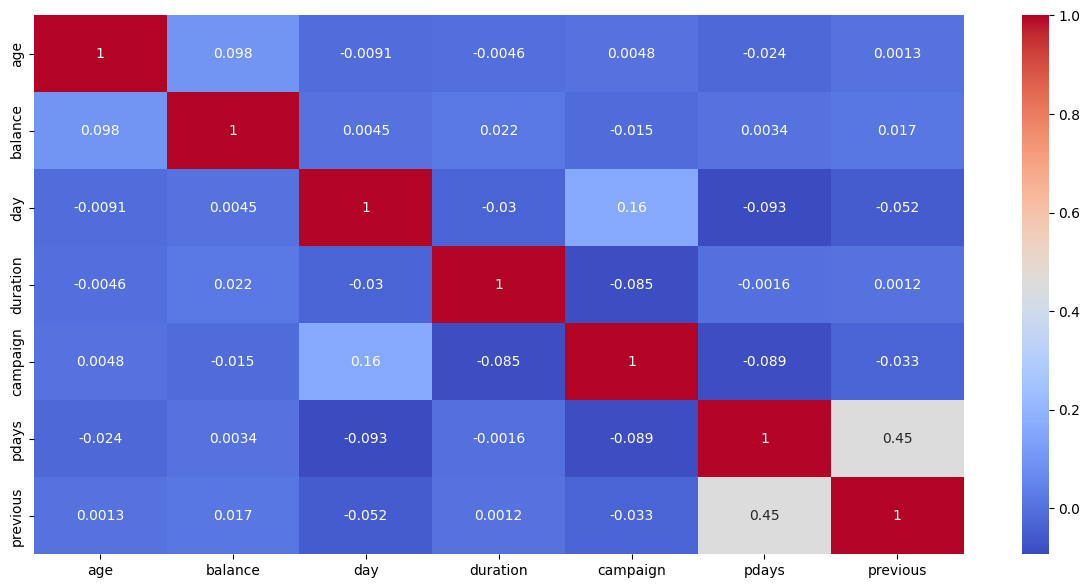

In [30]:
# Correlation Heatmap visualization code
## Checking for correlation.
cor_mat=df.corr()
fig = plt.figure(figsize=(15,7))
sns.heatmap(cor_mat,annot=True,cmap='coolwarm')

##### 1. Why did you pick the specific chart?

To visualize the collinearity of the numerical variables.

##### 2. What is/are the insight(s) found from the chart?

Almost there are no correlation amoung the variables.

#### Chart - 15 - Pair Plot 

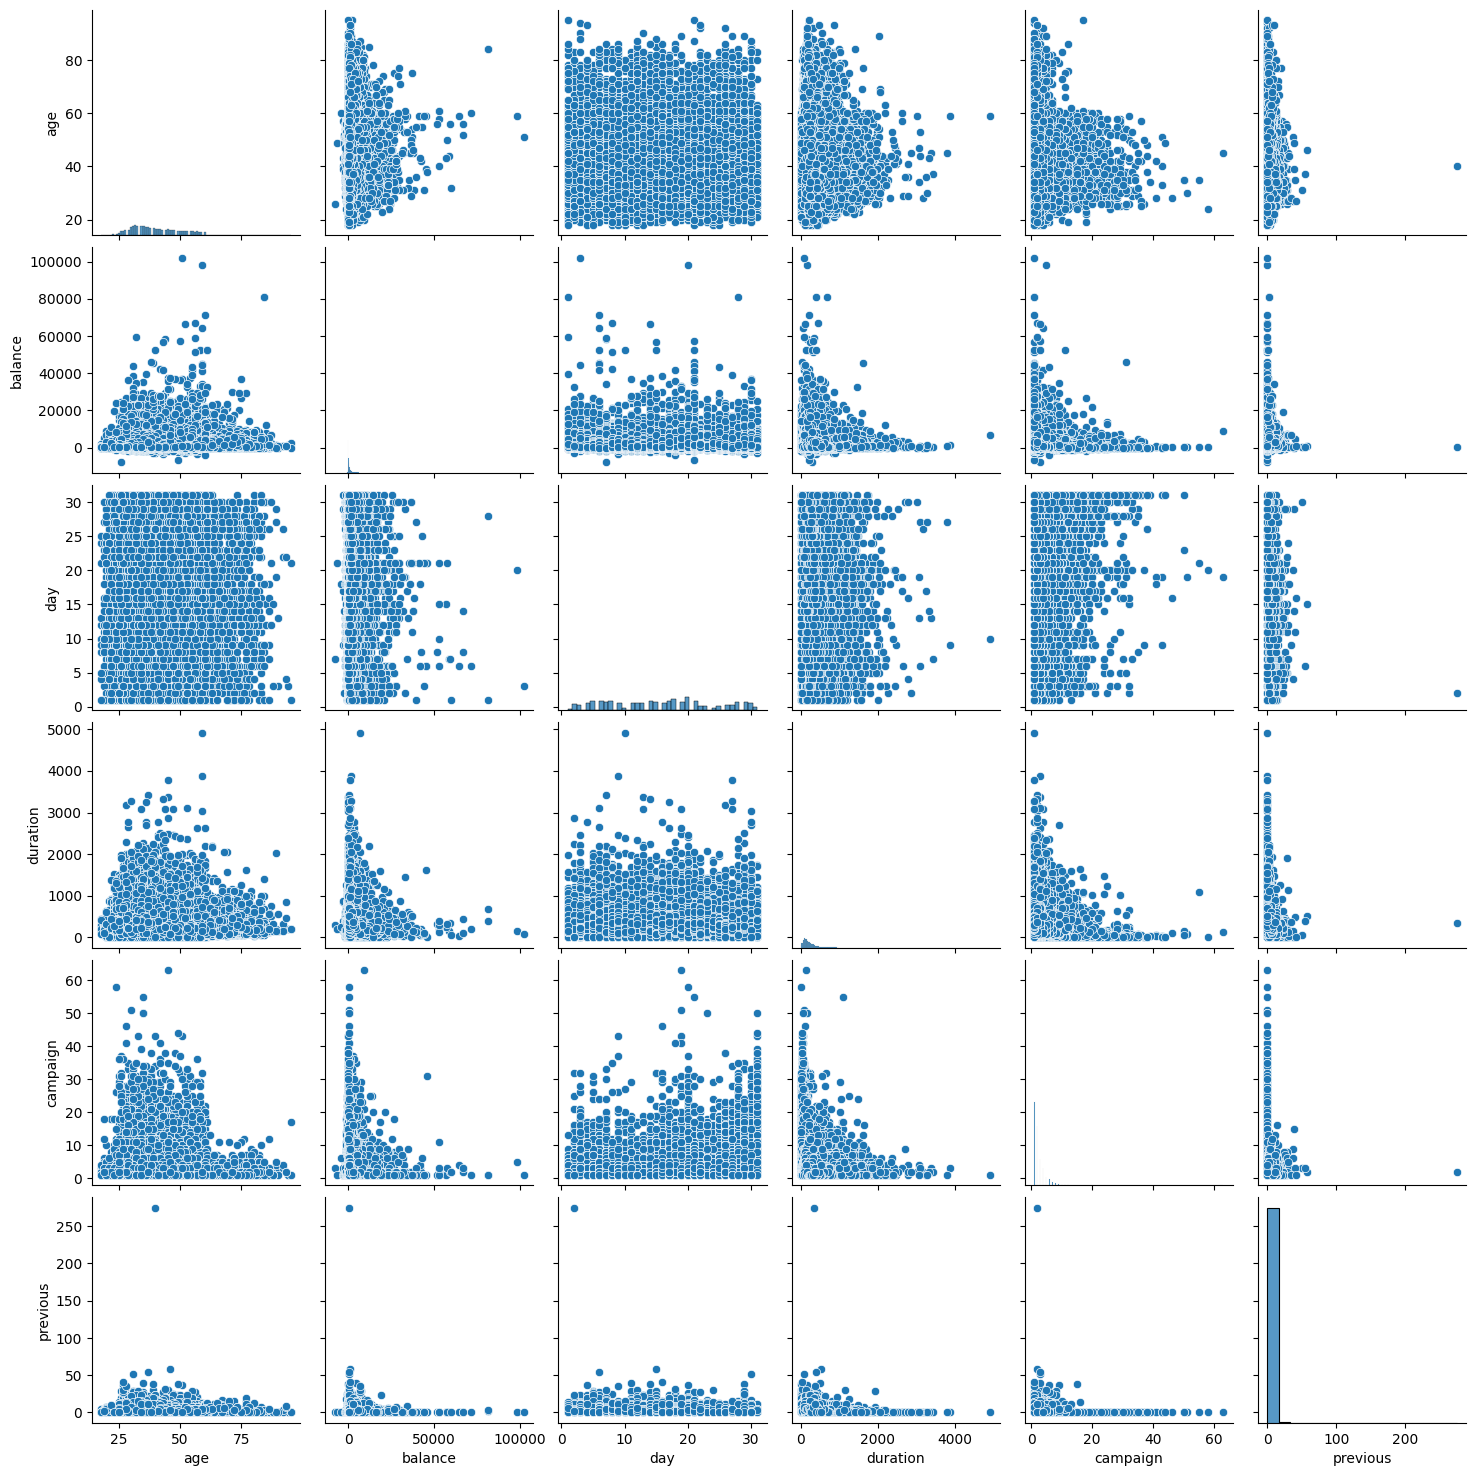

In [31]:
# Pair Plot visualization code of relations between various continous features
sns.pairplot(df[continuous_features], palette="husl")

##### 1. Why did you pick the specific chart?

To check the relation between two variables.

##### 2. What is/are the insight(s) found from the chart?

It is identified that the balance and duration has negative correlation that indicates that the customers who are rich are spending less time on a call.
Similarly campaign and duration has also negatively correalted.

## ***5. Hypothesis Testing***

### Based on your chart experiments, define three hypothetical statements from the dataset. In the next three questions, perform hypothesis testing to obtain final conclusion about the statements through your code and statistical testing.

Answer Here.

In [32]:
# Function for hypothetical testing
class statistic:
  def proportion(self,sample,hyp,size):
    return (sample - hyp)/math.sqrt(hyp*(1-hyp)/size)
  def mean(self,hyp,sample,size,std):
    return (sample - hyp)*math.sqrt(size)/std
  def varience(self,hyp,sample,size):
    return (size-1)*sample/hyp

In [33]:
# calculating variance
variance = lambda x : sum([(i - np.mean(x))**2 for i in x])/(len(x)-1)

In [34]:
# creating instance of the class
statistic = statistic()

In [35]:
zcdf = lambda x: norm(0,1).cdf(x)

In [36]:
def p_value(z,tailed):
  z=round(zcdf(z),10)
  if tailed=='l':
    return z
  elif tailed == 'r':
    return 1-z
  elif tailed == 'd':
    if z>0.5:
      return 2*(1-z)
    else:
      return 2*z
  else:
    return np.nan

In [37]:
# Function for conclusion of statistical test
def conclusion(p):
  significance_level = 0.05
  if p>significance_level:
    return f"Failed to reject the Null Hypothesis for p = {p}."
  else:
    return f"Null Hypothesis rejected Successfully for p = {p}"

### Hypothetical Statement - 1

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

Average call duration is more than 300 seconds.
* **Null Hypothesis H0** : ℳ = 300   , Mean duration is 300
* **Alternative Hypothesis H1** : ℳ !=300 , Mean duration is not 300

#### 2. Perform an appropriate statistical test.

In [38]:
# Perform Statistical Test to obtain P-Value
relevant_df = df['duration'].copy()
hypothesis_mean = 300
size = 150
relevant_df = relevant_df[150:300]
std = np.std(relevant_df)
sample_mean = np.mean(relevant_df)
z = statistic.mean(hypothesis_mean,sample_mean,size,std)
p = p_value(z,'d') #both tailed test
print(conclusion(p))

Failed to reject the Null Hypothesis for p = 0.4934265322.


##### Which statistical test have you done to obtain P-Value?

Z score test was conducted

##### Why did you choose the specific statistical test?

The standard deviation value was known for that Z score test was conducted

### Hypothetical Statement - 2

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

Lets formulate our hypothesis where we considerd that mean account balance of the population is 1000.
* **Null Hypothesis H0** : ℳ > 1000   , Mean account balance is more than 1000
* **Alternative Hypothesis H1** : ℳ <=1000  , Mean account balance is not more than 1000

#### 2. Perform an appropriate statistical test.

In [39]:
# Perform Statistical Test to obtain P-Value
relevant_df = df['balance'].copy()
hypothesis_mean = 1000
size = 150
relevant_df = relevant_df[-150:]
std = np.std(relevant_df)
sample_mean = np.mean(relevant_df)
z = statistic.mean(hypothesis_mean,sample_mean,size,std)
p = p_value(z,'l') #one tailed test
print(conclusion(p))

Failed to reject the Null Hypothesis for p = 0.9998005825.


##### Which statistical test have you done to obtain P-Value?

Z score test was conducted

##### Why did you choose the specific statistical test?

The standard deviation value was known for that Z score test was conducted

### Hypothetical Statement - 3

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

Increasing age is the important factor fror term deposite
*  **Null Hypothesis(H0)**  - Increasing age is an important factor for term deposit.
* **Alternative Hypothesis(H1)**  - Age is not related to term deposit.

#### 2. Perform an appropriate statistical test.

In [40]:
# Converting categorical features to binary output
df[['default','housing','loan','y']]=df[['default','housing','loan','y']].replace(["yes","no"],[1,0])

In [41]:
# Perform Statistical Test to obtain P-Value
from scipy.stats import chi2_contingency
  
# defining the table
data = [df['age'], df['y']]
stat, p, dof, expected = chi2_contingency(data)
  
# interpret p-value
alpha = 0.05
print("p value is " + str(p))
if p <= alpha:
    print('Dependent (reject H0)')
else:
    print('Independent (failed to reject H0)')


p value is 1.0
Independent (failed to reject H0)


##### Which statistical test have you done to obtain P-Value?

Chi square test was conducted

##### Why did you choose the specific statistical test?

A chi-square test is used in statistics to test the independence of two variables. Our aim was to know whether age is related to the response variable or not so we used this test here

## ***6. Feature Engineering & Data Pre-processing***

### 1. Handling Missing Values

In [42]:
# Handling Missing Values & Missing Value Imputation
df.isnull().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
y            0
dtype: int64

#### What all missing value imputation techniques have you used and why did you use those techniques?

There are no missing values in the dataset

### 2. Handling Outliers

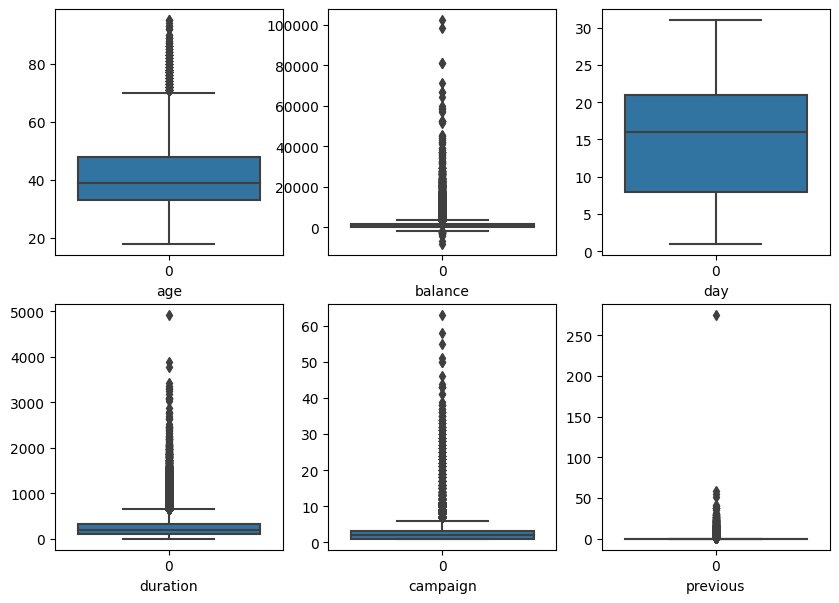

In [43]:
# Handling Outliers & Outlier treatments
# Box plot for checking the outliers
plt.figure(figsize=(10,30), facecolor='white')
plotnumber =1
for continuous_features in continuous_features:
    ax = plt.subplot(8,3,plotnumber)
    sns.boxplot(df[continuous_features])
    plt.xlabel(continuous_features)
    plotnumber+=1
plt.show()

In [44]:
# Removing outliers by Z score method
from scipy import stats
z = np.abs(stats.zscore(df[['age','balance','duration','campaign','pdays','previous']]))
print(z)
df=df[(z<3).all(axis=1)]
df.shape

            age   balance  duration  campaign     pdays  previous
0      1.606965  0.256419  0.011016  0.569351  0.411453  0.251940
1      0.288529  0.437895  0.416127  0.569351  0.411453  0.251940
2      0.747384  0.446762  0.707361  0.569351  0.411453  0.251940
3      0.571051  0.047205  0.645231  0.569351  0.411453  0.251940
4      0.747384  0.447091  0.233620  0.569351  0.411453  0.251940
...         ...       ...       ...       ...       ...       ...
45206  0.947747  0.176460  2.791329  0.076230  0.411453  0.251940
45207  2.831227  0.120447  0.768224  0.246560  0.411453  0.251940
45208  2.925401  1.429593  3.373797  0.721811  1.436189  1.050473
45209  1.512791  0.228024  0.970146  0.399020  0.411453  0.251940
45210  0.370689  0.528364  0.399328  0.246560  1.476138  4.523577

[45211 rows x 6 columns]


(40209, 17)

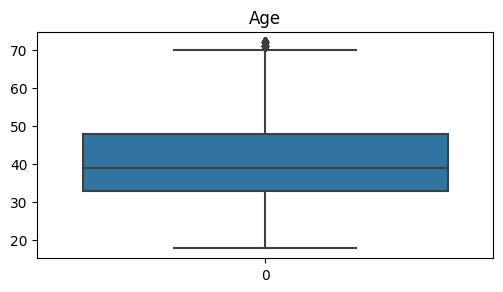

In [45]:
#checking outliers removed ot not
plt.figure(figsize=(20,10))
plt.subplot(3,3,1)
sns.boxplot(df['age'])
plt.title("Age")
plt.show()

##### What all outlier treatment techniques have you used and why did you use those techniques?

In order to deal with outliers and scaled down the data the z score technique was used.

### 3. Categorical Encoding

In [46]:
# Encode your categorical columns
# one hot encoding in features  'marital', 'education', 'poutcome', 'contact.
df = pd.get_dummies(df,columns=['job', 'marital', 'education', 'poutcome', 'contact'])
df.head()

,age,default,balance,housing,loan,day,month,duration,campaign,pdays,...,education_secondary,education_tertiary,education_unknown,poutcome_failure,poutcome_other,poutcome_success,poutcome_unknown,contact_cellular,contact_telephone,contact_unknown
0,58,0,2143,1,0,5,may,261,1,-1,...,0,1,0,0,0,0,1,0,0,1
1,44,0,29,1,0,5,may,151,1,-1,...,1,0,0,0,0,0,1,0,0,1
2,33,0,2,1,1,5,may,76,1,-1,...,1,0,0,0,0,0,1,0,0,1
3,47,0,1506,1,0,5,may,92,1,-1,...,0,0,1,0,0,0,1,0,0,1
4,33,0,1,0,0,5,may,198,1,-1,...,0,0,1,0,0,0,1,0,0,1


#### What all categorical encoding techniques have you used & why did you use those techniques?

One Hot Encoding was used for categorical variables, because for machine learning model the varialbls should be in binory form.

### 4. Feature Manipulation & Selection

#### 1. Feature Manipulation

In [47]:
# Manipulate Features to minimize feature correlation and create new features
# dropping month and duration column from the dataset
df = df.drop(columns=['duration'], axis=1)
df = df.drop(columns=['month'], axis=1)


#### 2. Feature Selection

In [48]:
# Select your features wisely to avoid overfitting
# Independent variable
x=df.drop(['y'],axis=1)

# Dependent variable
y=df['y']  

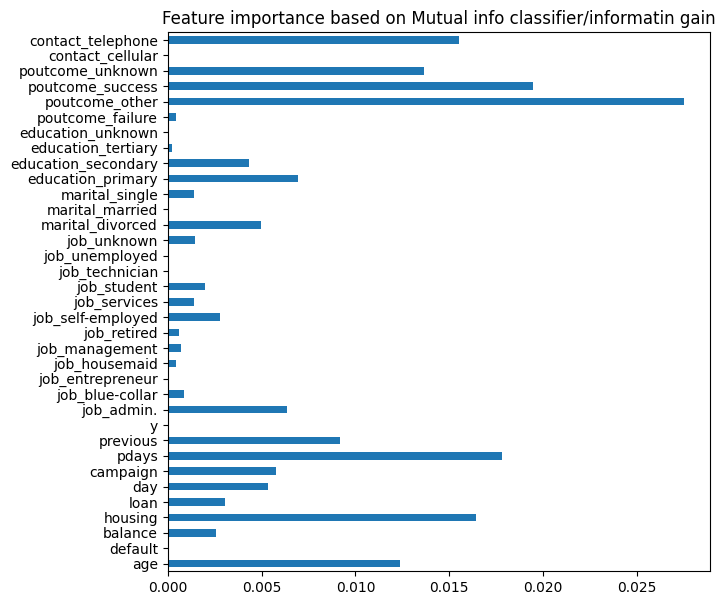

In [49]:
# Information gain method for feature selection
from sklearn.feature_selection import mutual_info_classif

importance = mutual_info_classif(x,y)
feat_importances = pd.Series(importance,df.columns[0:len(df.columns[0:35])])
feat_importances.plot(kind='barh')
plt.title("Feature importance based on Mutual info classifier/informatin gain")
plt.show()

##### What all feature selection methods have you used  and why?

Information gain method is used for future selection.It calculates the reduction in entropy from the transformation of a dataset. It is the efficient method for future selection.

##### Which all features you found important and why?

As per technique used above we can say that all the features that we have included has significant importance . So we are keeping all of them.

### 5. Data Transformation

#### Do you think that your data needs to be transformed? If yes, which transformation have you used. Explain Why?

Since we have treated the outliers above and in the next section we are going to scale the data using standard scaler where we will tansform the numerical features in the scale of 0 to 1. So we do not need data transformation now.

### 6. Data Scaling

In [50]:
# Scaling your data
from sklearn.preprocessing import StandardScaler

# Copying original dataframe
df1 = df.copy()

scaler = StandardScaler()
num_cols = ['age', 'balance', 'day', 'campaign', 'previous']
df1[num_cols] = scaler.fit_transform(df1[num_cols])

df1.head()

,age,default,balance,housing,loan,day,campaign,pdays,previous,y,...,education_secondary,education_tertiary,education_unknown,poutcome_failure,poutcome_other,poutcome_success,poutcome_unknown,contact_cellular,contact_telephone,contact_unknown
0,1.719153,0,0.615006,1,0,-1.293683,-0.75041,-1,-0.333655,0,...,0,1,0,0,0,0,1,0,0,1
1,0.331162,0,-0.612065,1,0,-1.293683,-0.75041,-1,-0.333655,0,...,1,0,0,0,0,0,1,0,0,1
2,-0.759402,0,-0.627737,1,1,-1.293683,-0.75041,-1,-0.333655,0,...,1,0,0,0,0,0,1,0,0,1
3,0.628589,0,0.245260,1,0,-1.293683,-0.75041,-1,-0.333655,0,...,0,0,1,0,0,0,1,0,0,1
4,-0.759402,0,-0.628317,0,0,-1.293683,-0.75041,-1,-0.333655,0,...,0,0,1,0,0,0,1,0,0,1


##### Which method have you used to scale you data and why?

StandardScalar method was used to scale the data.This method is sed when the data is normally distributed.

### 7. Dimesionality Reduction

##### Do you think that dimensionality reduction is needed? Explain Why?

No, here we do not need Dimensionality Reduction as we have seen above that all the features are significant enough and there are only 31 columns in our dataset.

### 8. Data Splitting

In [51]:
# Split your data to train and test. Choose Splitting ratio wisely.
# Select Features
indepedent_variables = df1.drop(['y'], axis=1)

# Select Target
target = df1['y']

# Set Training and Testing Data
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(indepedent_variables , target, 
                                                    shuffle = True, 
                                                    test_size=0.2, 
                                                    random_state=1)

# Show the Training and Testing Data
print('Shape of training feature:', X_train.shape)
print('Shape of testing feature:', X_test.shape)
print('Shape of training label:', y_train.shape)
print('Shape of training label:', y_test.shape)

Shape of training feature: (32167, 35)
Shape of testing feature: (8042, 35)
Shape of training label: (32167,)
Shape of training label: (8042,)


##### What data splitting ratio have you used and why? 

80:20 ratio is used for data splitting.This ratio are mostly used in ML model

### 9. Handling Imbalanced Dataset

In [52]:
# Original class distribution of target value
print('Original class distribution: \n')
print(target.value_counts())

Original class distribution: 

0    36155
1     4054
Name: y, dtype: int64


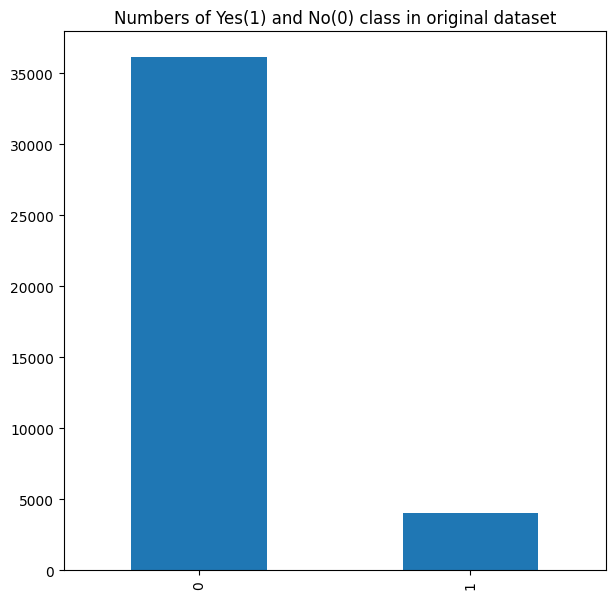

In [53]:
#  visualization of class imbalance in target variables
df1.y.value_counts().plot(kind="bar")
plt.title("Numbers of Yes(1) and No(0) class in original dataset")
plt.show()

##### Do you think the dataset is imbalanced? Explain Why.

Yes the target value is imbalanced.The number of 0 labels is 361555 and the number of 1 labels is 4054

In [54]:
# Handling Imbalanced Dataset 
# importing libraries for smote
from imblearn.over_sampling import SMOTE
from collections import Counter
# applying smote technique
sm = SMOTE(random_state=0)
X_res, y_res = sm.fit_resample(X_train, y_train)
# Preview synthetic sample class distribution
print('Synthetic sample class distribution: \n')
print(pd.Series(y_res).value_counts()) 

Synthetic sample class distribution: 

0    28899
1    28899
Name: y, dtype: int64


##### What technique did you use to handle the imbalance dataset and why? (If needed to be balanced)

SMOTE- (Synthetic Minority Oversampling Technique) technique has been used tohandle the imbalanced data set. It works by randomly picking a point from the minority class and computing the k-nearest neighbors for this point. The synthetic points are added between the chosen point and its neighbors

## ***7. ML Model Implementation***

In [55]:
# defining a function for model prediction and calculate the evaluation metrics
def evaluate_model(model, x_test, y_test):
    # Predict Test Data 
    y_pred = model.predict(x_test)

    # Calculate accuracy, precision, recall, f1-score, and kappa score
    acc = metrics.accuracy_score(y_test, y_pred)
    prec = metrics.precision_score(y_test, y_pred)
    rec = metrics.recall_score(y_test, y_pred)
    f1 = metrics.f1_score(y_test, y_pred)
    kappa = metrics.cohen_kappa_score(y_test, y_pred)

    # Calculate area under curve (AUC)
    y_pred_proba = model.predict_proba(x_test)[::,1]
    fpr, tpr, _ = metrics.roc_curve(y_test, y_pred_proba)
    auc = metrics.roc_auc_score(y_test, y_pred_proba)

    # Display confussion matrix
    cm = metrics.confusion_matrix(y_test, y_pred)

    return {'acc': acc, 'prec': prec, 'rec': rec, 'f1': f1, 'kappa': kappa, 
            'fpr': fpr, 'tpr': tpr, 'auc': auc, 'cm': cm}

### ML Model - 1 Logistic Regression

In [56]:
# ML Model - 1 Implementation
clf = LogisticRegression(fit_intercept=True, max_iter=10000)
# Fit the Algorithm
clf.fit(X_res, y_res)
# Predict and Evaluate Model
clf_eval = evaluate_model(clf, X_res, y_res)
# Print result
print('Accuracy:', clf_eval['acc'])
print('Precision:', clf_eval['prec'])
print('Recall:', clf_eval['rec'])
print('F1 Score:', clf_eval['f1'])
print('Cohens Kappa Score:', clf_eval['kappa'])
print('Area Under Curve:', clf_eval['auc'])
print('Confusion Matrix:\n', clf_eval['cm'])

Accuracy: 0.8160143949617634
Precision: 0.8381530714259267
Recall: 0.7832796982594553
F1 Score: 0.809787858190534
Cohens Kappa Score: 0.6320287899235268
Area Under Curve: 0.8998050751709629
Confusion Matrix:
 [[24528  4371]
 [ 6263 22636]]


#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

Logistic regression is a supervised learning classification algorithm used to predict the probability of a target variable. The nature of target or dependent variable is dichotomous, which means there would be only two possible classes.

Logistic Regression may be a suitable fit in our scenario because recall and precision are 78.3% and 83.8%, respectively. The accuracy is just 77% in this case, but we want maximum recall to forecast as many true positives as possible so that we don't miss out on any customers who actually want to make a deposit.

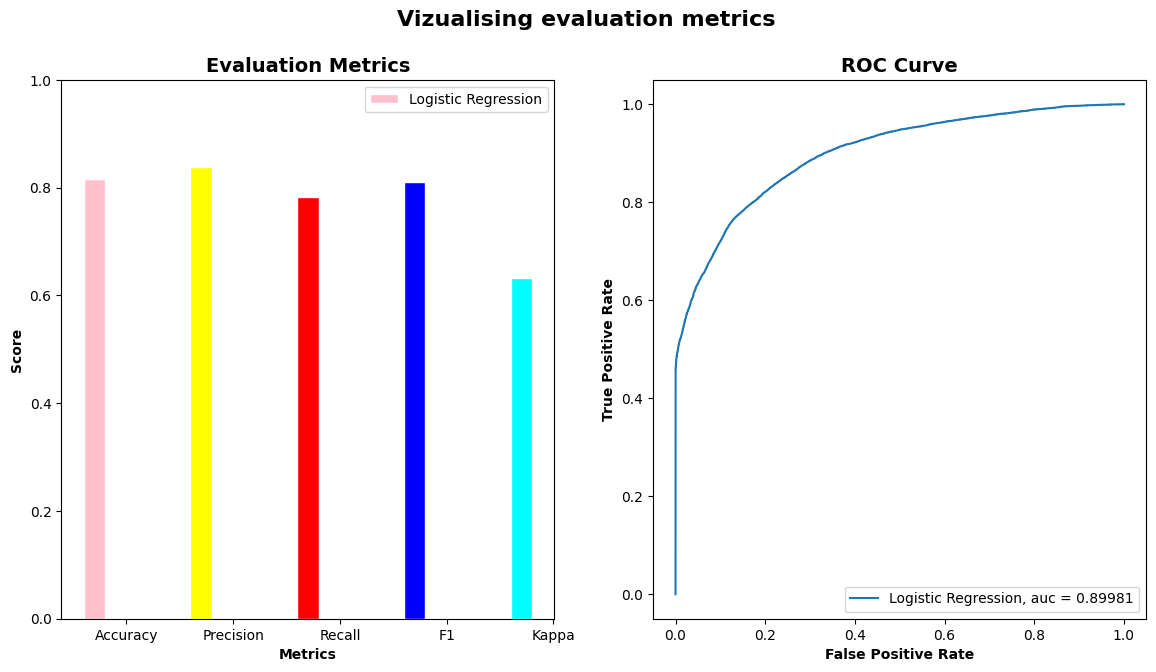

In [57]:
# Visualizing evaluation Metric Score chart
# Visualizing evaluation Metric Score chart
fig, (ax1, ax2) = plt.subplots(1, 2)
fig.suptitle('Vizualising evaluation metrics', fontsize=16, fontweight='bold')
fig.set_figheight(7)
fig.set_figwidth(14)
fig.set_facecolor('white')
barWidth = 0.2

clf_score = [clf_eval['acc'], clf_eval['prec'], clf_eval['rec'], clf_eval['f1'], clf_eval['kappa']]

## Set position of bar on X axis
r1 = np.arange(len(clf_score))
ax1.bar(r1, clf_score, width=barWidth, edgecolor='white', label='Logistic Regression',color=['pink', 'yellow', 'red', 'blue', 'cyan'])

## Configure x and y axis
ax1.set_xlabel('Metrics', fontweight='bold')
labels = ['Accuracy', 'Precision', 'Recall', 'F1', 'Kappa']
ax1.set_xticks([r + (barWidth * 1.5) for r in range(len(clf_score))], )
ax1.set_xticklabels(labels)
ax1.set_ylabel('Score', fontweight='bold')
ax1.set_ylim(0, 1)

## Create legend & title
ax1.set_title('Evaluation Metrics', fontsize=14, fontweight='bold')
ax1.legend()

# Second plot
ax2.plot(clf_eval['fpr'], clf_eval['tpr'], label='Logistic Regression, auc = {:0.5f}'.format(clf_eval['auc']))

## Configure x and y axis
ax2.set_xlabel('False Positive Rate', fontweight='bold')
ax2.set_ylabel('True Positive Rate', fontweight='bold')

## Create legend & title
ax2.set_title('ROC Curve', fontsize=14, fontweight='bold')
ax2.legend(loc=4)

plt.show()

[Text(0, 0.5, 'TD Accepted'), Text(0, 1.5, 'TD Rejected')]

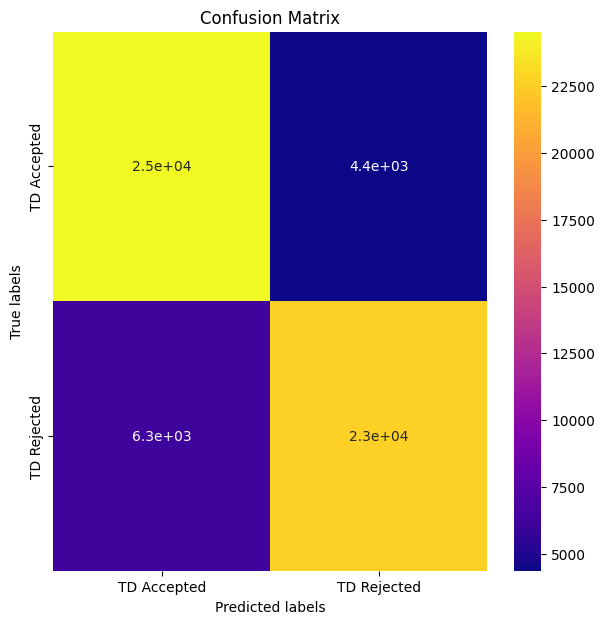

In [58]:
# Confusion matrix for Logistic Regression for both actual and predicted values
labels = ['TD Accepted','TD Rejected']
ax= plt.subplot()
sns.heatmap(clf_eval['cm'], annot=True, ax = ax,cmap='plasma') 
# labels, title and ticks
ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels')
ax.set_title('Confusion Matrix')
ax.xaxis.set_ticklabels(labels)
ax.yaxis.set_ticklabels(labels)

#### 2. Cross- Validation & Hyperparameter Tuning

In [59]:
# ML Model - 1 Implementation with hyperparameter optimization techniques (GridSearch CV)
LR = LogisticRegression()
LRparam_grid = { 'C': [ 0.1, 1, 10], 'penalty': ['l1', 'l2'], 'solver': ['liblinear', 'saga']}
LR_search = GridSearchCV(LR, param_grid=LRparam_grid, refit = True, cv=5)
# # fitting the model for grid search 
LR_search.fit(X_res , y_res)
# Predict on the model
LR_search.best_params_

{'C': 10, 'penalty': 'l2', 'solver': 'liblinear'}

In [60]:
# Fit the Algorithm
clf = LogisticRegression(fit_intercept=True, max_iter=1000 , C = 10, penalty = 'l2',solver='liblinear')
clf.fit(X_res, y_res)
# Predict and Evaluate Model
clf_eval = evaluate_model(clf, X_res, y_res)
# Print result
print('Accuracy:', clf_eval['acc'])
print('Precision:', clf_eval['prec'])
print('Recall:', clf_eval['rec'])
print('F1 Score:', clf_eval['f1'])
print('Cohens Kappa Score:', clf_eval['kappa'])
print('Area Under Curve:', clf_eval['auc'])
print('Confusion Matrix:\n', clf_eval['cm'])

Accuracy: 0.8160143949617634
Precision: 0.8386295376172642
Recall: 0.7826222360635317
F1 Score: 0.8096584807045178
Cohens Kappa Score: 0.6320287899235268
Area Under Curve: 0.8998644032789898
Confusion Matrix:
 [[24547  4352]
 [ 6282 22617]]


##### Which hyperparameter optimization technique have you used and why?

Grid Search CV Hyperparameter optimization technique was used and tried to find the best combination of values of C, Penalty and Solver to optimize our model. We got best params Config: {'C': 10, 'penalty': 'l2', 'solver': 'liblinear'}  We have also used Cross validation with CV = 5

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

After the hyperparameter tuning of Logistic Regression we observed very slight improvement in the evaluation metrics.

Accuracy Before: 81.6 % || Accuracy After: 81.6 %

Precision Before: 83.81 % || Precision After:83.86 %

Recall Before: 78.32 % || Recall After: 78.26 %

F1 Score Before: 80.97 %|| F1 Score After: 80.96 %

Cohens Kappa Score Before: 63.2 %|| Cohens Kappa Score After: 63.2 %

Area Under Curve Before: 89.98 % || Area Under Curve After: 89.98 %

### ML Model - 2 Decision Tree

In [61]:
from sklearn import tree
# ML Model - 1 Implementation
dtc = tree.DecisionTreeClassifier(random_state=0)
# Fit the Algorithm
dtc.fit(X_res, y_res)
# Predict and Evaluate the Model
dtc_eval = evaluate_model(dtc, X_test, y_test)
# Print result
print('Accuracy:', dtc_eval['acc'])
print('Precision:', dtc_eval['prec'])
print('Recall:', dtc_eval['rec'])
print('F1 Score:', dtc_eval['f1'])
print('Cohens Kappa Score:', dtc_eval['kappa'])
print('Area Under Curve:', dtc_eval['auc'])
print('Confusion Matrix:\n', dtc_eval['cm'])

Accuracy: 0.8203183287739368
Precision: 0.20342034203420342
Recall: 0.2875318066157761
F1 Score: 0.23827095413811283
Cohens Kappa Score: 0.13979321619917473
Area Under Curve: 0.5827818900774581
Confusion Matrix:
 [[6371  885]
 [ 560  226]]


#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

A decision tree is a type of machine learning algorithm that uses a tree like modelto make predictions based on the relationship between the features in a dataset. It works by dividing the data into smaller and smaller groups based on the values of the features, until it reaches a decision about the target variable for each group

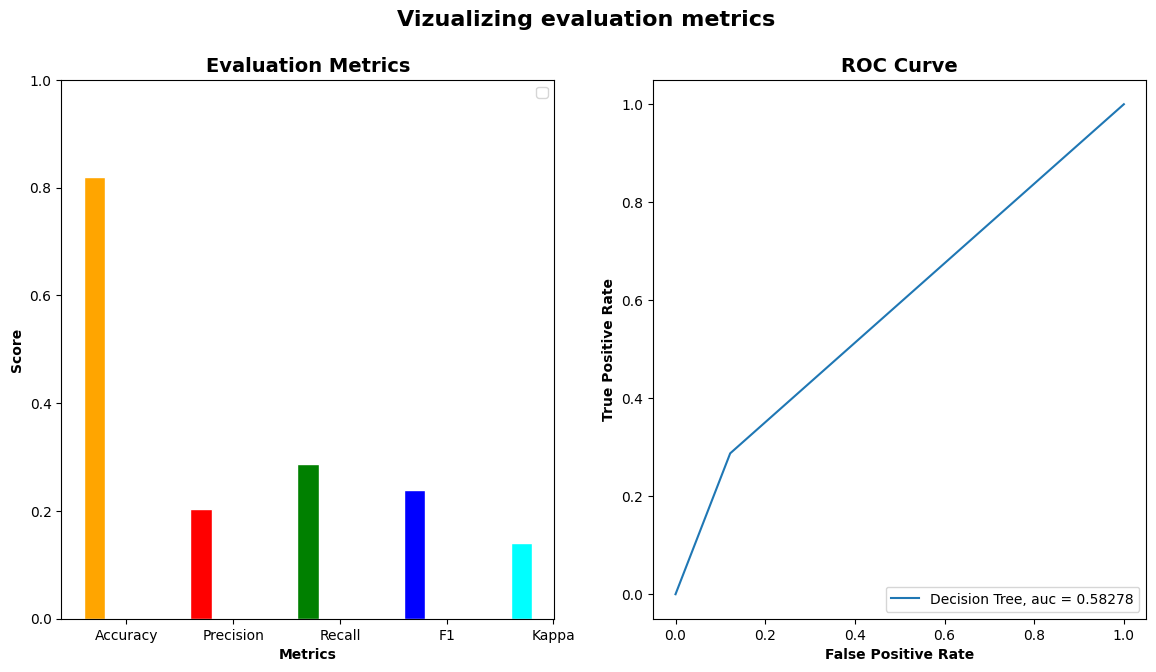

In [62]:
# Visualizing evaluation Metric Score chart
# Intitialize figure with two plots
fig, (ax1, ax2) = plt.subplots(1, 2)
fig.suptitle('Vizualizing evaluation metrics', fontsize=16, fontweight='bold')
fig.set_figheight(7)
fig.set_figwidth(14)
fig.set_facecolor('white')
barWidth = 0.2

# First plot
dtc_score = [dtc_eval['acc'], dtc_eval['prec'], dtc_eval['rec'], dtc_eval['f1'], dtc_eval['kappa']]

## Set position of bar on X axis
r1 = np.arange(len(dtc_score))
ax1.bar(r1, dtc_score, width=barWidth, edgecolor='white',color=['orange', 'red', 'green', 'blue', 'cyan'])

## Configure x and y axis
ax1.set_xlabel('Metrics', fontweight='bold')
labels = ['Accuracy', 'Precision', 'Recall', 'F1', 'Kappa']
ax1.set_xticks([r + (barWidth * 1.5) for r in range(len(dtc_score))], )
ax1.set_xticklabels(labels)
ax1.set_ylabel('Score', fontweight='bold')
ax1.set_ylim(0, 1)

## Create legend & title
ax1.set_title('Evaluation Metrics', fontsize=14, fontweight='bold')
ax1.legend()

# Second plot
ax2.plot(dtc_eval['fpr'], dtc_eval['tpr'], label='Decision Tree, auc = {:0.5f}'.format(dtc_eval['auc']))

## Configure x and y axis
ax2.set_xlabel('False Positive Rate', fontweight='bold')
ax2.set_ylabel('True Positive Rate', fontweight='bold')

## Create legend & title
ax2.set_title('ROC Curve', fontsize=14, fontweight='bold')
ax2.legend(loc=4)

plt.show()

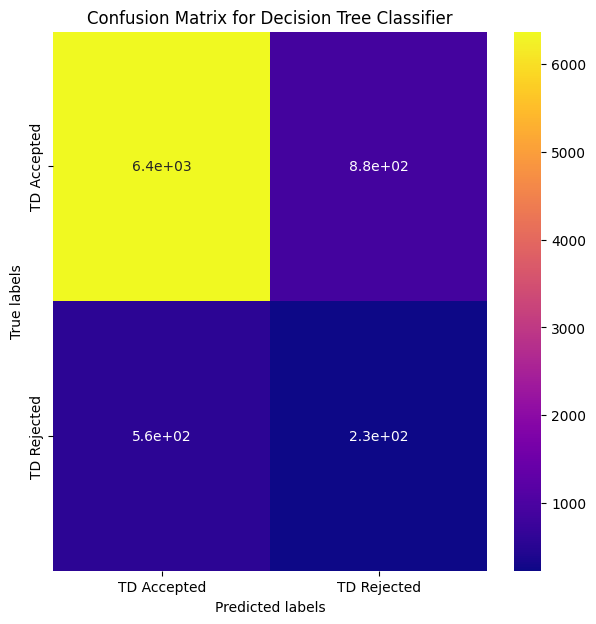

In [63]:
# Get the confusion matrix for both train and test
labels = ['TD Accepted','TD Rejected']
ax= plt.subplot()
sns.heatmap(dtc_eval['cm'], annot=True, ax = ax,cmap='plasma') 

# labels, title and ticks
ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels')
ax.set_title('Confusion Matrix for Decision Tree Classifier')
ax.xaxis.set_ticklabels(labels)
ax.yaxis.set_ticklabels(labels)

plt.show()

#### 2. Cross- Validation & Hyperparameter Tuning

In [64]:
# ML Model - 1 Implementation with hyperparameter optimization techniques (GridSearch CV)

from sklearn.model_selection import GridSearchCV

# Create the parameter grid based on the results of random search 
param_grid = {'max_depth': [25,26,27,28,29,30,31,32,35,37,40,50, 80, 100]}

# Create a base model
dtc_grid = tree.DecisionTreeClassifier(random_state=0)


# Initiate the grid search model
grid_search = GridSearchCV(estimator=dtc_grid, param_grid=param_grid, scoring='roc_auc',
                           cv=5, n_jobs=-1, verbose=2)

# Fit the algorithm
grid_search.fit(X_res, y_res)
# Predict the model
grid_search.best_params_

Fitting 5 folds for each of 14 candidates, totalling 70 fits


{'max_depth': 25}

In [65]:
# Building Decision Tree model with optiized parameter 
dtc = tree.DecisionTreeClassifier(random_state=0,max_depth=25)
dtc.fit(X_res, y_res)
# Evaluate Model
dtc_eval = evaluate_model(dtc, X_test, y_test)
# Print result
print('Accuracy:', dtc_eval['acc'])
print('Precision:', dtc_eval['prec'])
print('Recall:', dtc_eval['rec'])
print('F1 Score:', dtc_eval['f1'])
print('Cohens Kappa Score:', dtc_eval['kappa'])
print('Area Under Curve:', dtc_eval['auc'])
print('Confusion Matrix:\n', dtc_eval['cm'])

Accuracy: 0.8099975130564536
Precision: 0.20970266040688576
Recall: 0.34096692111959287
F1 Score: 0.2596899224806202
Cohens Kappa Score: 0.15774830304615473
Area Under Curve: 0.6102992592249706
Confusion Matrix:
 [[6246 1010]
 [ 518  268]]


##### Which hyperparameter optimization technique have you used and why?

Gridserach Cv technique was used, it is efficient technique.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

Accuracy Before: 82.03% || Accuracy After: 80.99%

Precision Before: 20.34% || Precision After: 20.97%

Recall Before: 28.75% || Recall After: 34.09%

F1 Score Before: 23.82%|| F1 Score After: 25.97%

Cohens Kappa Score Before: 13.97%|| Cohens Kappa Score After: 15.77%

Area Under Curve Before: 58.27.02% || Area Under Curve After: 61.03%

We can see that after tuning the hyperparameter max depth there is an increment of most of the metrics.

### ML Model - 3  KNearst Neighbors Classifier

In [66]:
# ML Model - 3 Implementation
# Building KNN model 
knn = KNeighborsClassifier()
# Fit the Algorithm
knn.fit(X_res, y_res)
# Evaluate Model
knn_eval = evaluate_model(knn, X_test, y_test)
# Print result
print('Accuracy:', knn_eval['acc'])
print('Precision:', knn_eval['prec'])
print('Recall:', knn_eval['rec'])
print('F1 Score:', knn_eval['f1'])
print('Cohens Kappa Score:', knn_eval['kappa'])
print('Area Under Curve:', knn_eval['auc'])
print('Confusion Matrix:\n', knn_eval['cm'])


Accuracy: 0.7398657050484954
Precision: 0.19313909774436092
Recall: 0.5229007633587787
F1 Score: 0.2820864790665752
Cohens Kappa Score: 0.16254069605258004
Area Under Curve: 0.6912122914509988
Confusion Matrix:
 [[5539 1717]
 [ 375  411]]


#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

K Nearest neighbor is a type of machine learning algorithm that makes predictions for a sample by finding the most similar samples in the training data and using their labels to make a prediction.

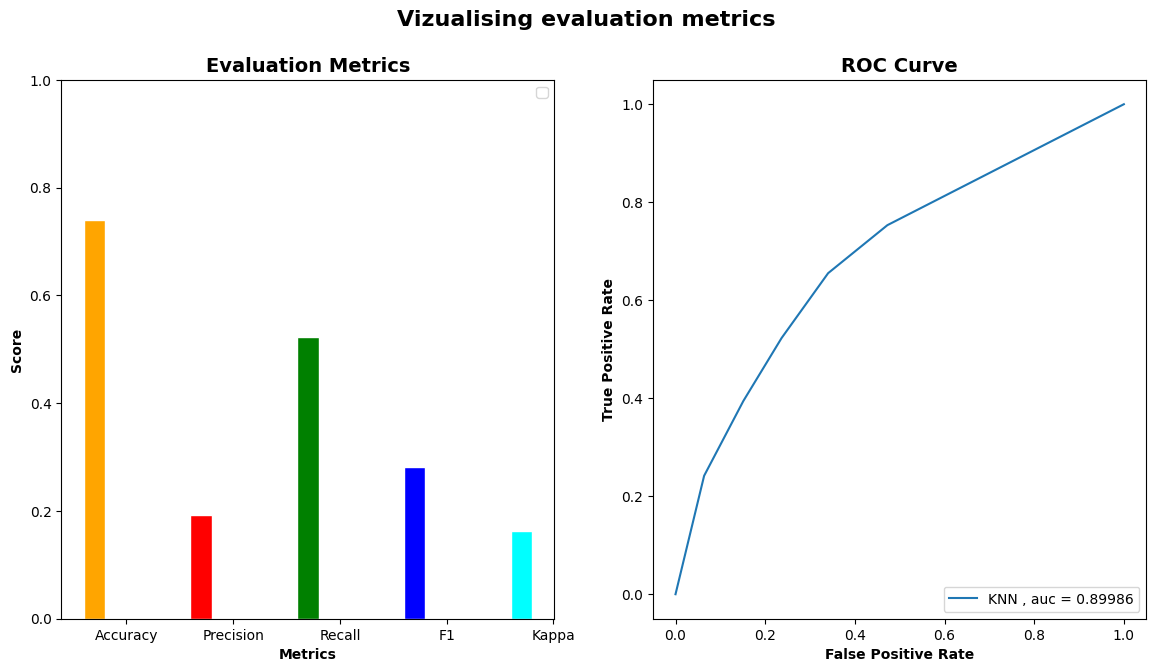

In [67]:
# Visualizing evaluation Metric Score chart
fig, (ax1, ax2) = plt.subplots(1, 2)
fig.suptitle('Vizualising evaluation metrics', fontsize=16, fontweight='bold')
fig.set_figheight(7)
fig.set_figwidth(14)
fig.set_facecolor('white')
barWidth = 0.2

knn_score = [knn_eval['acc'], knn_eval['prec'], knn_eval['rec'], knn_eval['f1'], knn_eval['kappa']]

## Set position of bar on X axis
r1 = np.arange(len(clf_score))
ax1.bar(r1, knn_score, width=barWidth, edgecolor='white',color=['orange', 'red', 'green', 'blue', 'cyan'])

## Configure x and y axis
ax1.set_xlabel('Metrics', fontweight='bold')
labels = ['Accuracy', 'Precision', 'Recall', 'F1', 'Kappa']
ax1.set_xticks([r + (barWidth * 1.5) for r in range(len(clf_score))], )
ax1.set_xticklabels(labels)
ax1.set_ylabel('Score', fontweight='bold')
ax1.set_ylim(0, 1)

## Create legend & title
ax1.set_title('Evaluation Metrics', fontsize=14, fontweight='bold')
ax1.legend()

# Second plot
ax2.plot(knn_eval['fpr'], knn_eval['tpr'], label='KNN , auc = {:0.5f}'.format(clf_eval['auc']))

## Configure x and y axis
ax2.set_xlabel('False Positive Rate', fontweight='bold')
ax2.set_ylabel('True Positive Rate', fontweight='bold')

## Create legend & title
ax2.set_title('ROC Curve', fontsize=14, fontweight='bold')
ax2.legend(loc=4)

plt.show()

#### 2. Cross- Validation & Hyperparameter Tuning

In [68]:
# ML Model - 3 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)
# Create a grid of hyperparameters to search
param_grid = {
    'n_neighbors': [1, 3, 5, 7, 9, 11, 13, 15, 17, 19]
}

# Create a KNN model
knn = KNeighborsClassifier()

# Create a grid search CV object
grid_search = GridSearchCV(knn, param_grid, cv=5)

# Fit the Algorithm
grid_search.fit(X_res, y_res)

# Print the best parameters
print(grid_search.best_params_)


{'n_neighbors': 1}


In [69]:
# Building KNN model 
knn = KNeighborsClassifier(n_neighbors=1)
# Fit the Algorithm
knn.fit(X_res, y_res)
# Evaluate Model
knn_eval = evaluate_model(knn, X_test, y_test)
# Print result
print('Accuracy:', knn_eval['acc'])
print('Precision:', knn_eval['prec'])
print('Recall:', knn_eval['rec'])
print('F1 Score:', knn_eval['f1'])
print('Cohens Kappa Score:', knn_eval['kappa'])
print('Area Under Curve:', knn_eval['auc'])
print('Confusion Matrix:\n', knn_eval['cm'])

Accuracy: 0.7971897537925889
Precision: 0.20680083275503122
Recall: 0.3791348600508906
F1 Score: 0.2676246070947463
Cohens Kappa Score: 0.16157852434518882
Area Under Curve: 0.6108050264973307
Confusion Matrix:
 [[6113 1143]
 [ 488  298]]


##### Which hyperparameter optimization technique have you used and why?

Gridserach Cv technique was used, it is efficient technique.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

After the hyperparameter tuning of K Neighbour Classifier we observed very slight improvement in the evaluation metrics.

Accuracy Before: 73.9% || Accuracy After: 79.71%

Precision Before: 19.31% || Precision After:20.68 %

Recall Before: 52.29% || Recall After: 37.91%

F1 Score Before: 28.20%|| F1 Score After: 26.76%

Cohens Kappa Score Before: 16.25%|| Cohens Kappa Score After: 16.15%

Area Under Curve Before: 69.12% || Area Under Curve After:61 %

### ML Model -4 Naive Bayes model

In [70]:
# Implementation
nb = GaussianNB()
# Fit the Algorithm
nb.fit(X_res, y_res)
# Predict and Evaluate the Model
nb_eval = evaluate_model(nb, X_test, y_test)
# Print result
print('Accuracy:', nb_eval['acc'])
print('Precision:', nb_eval['prec'])
print('Recall:', nb_eval['rec'])
print('F1 Score:', nb_eval['f1'])
print('Cohens Kappa Score:', nb_eval['kappa'])
print('Area Under Curve:', nb_eval['auc'])
print('Confusion Matrix:\n', nb_eval['cm'])

Accuracy: 0.6533200696344194
Precision: 0.16744186046511628
Recall: 0.6412213740458015
F1 Score: 0.2655426765015806
Cohens Kappa Score: 0.13082081238928378
Area Under Curve: 0.6934045633200636
Confusion Matrix:
 [[4750 2506]
 [ 282  504]]


#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

Naive Bayes is a simple technique for constructing classifiers: models that assign class labels to problem instances, represented as vectors of feature values, where the class labels are drawn from some finite set. 

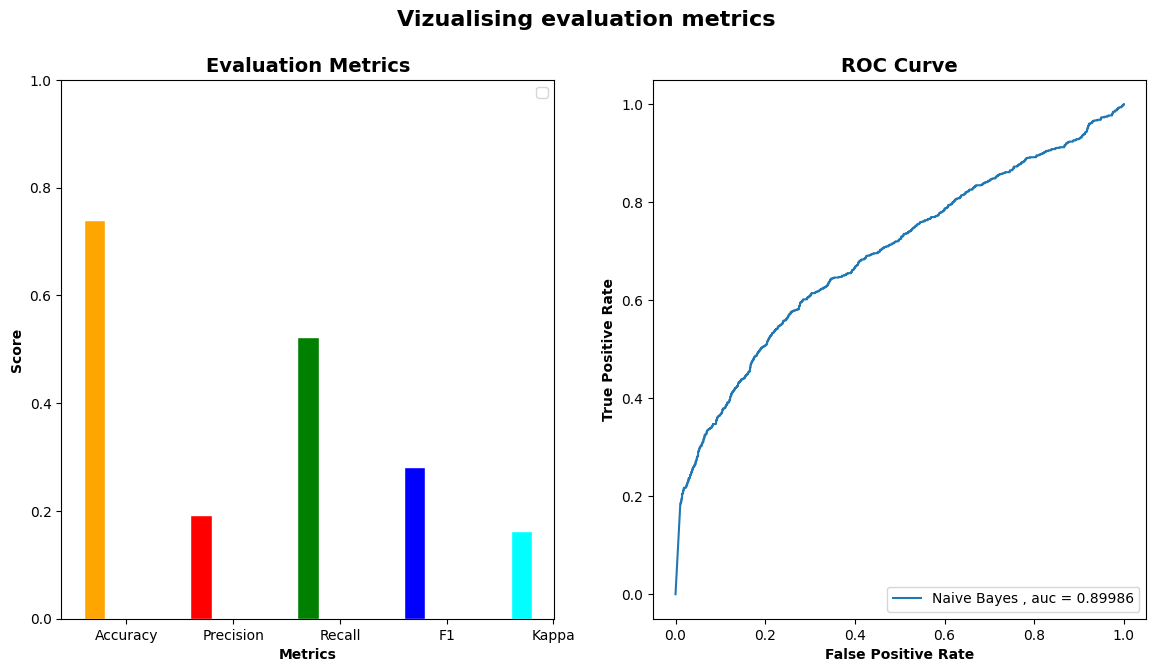

In [71]:
# Visualizing evaluation Metric Score chart
fig, (ax1, ax2) = plt.subplots(1, 2)
fig.suptitle('Vizualising evaluation metrics', fontsize=16, fontweight='bold')
fig.set_figheight(7)
fig.set_figwidth(14)
fig.set_facecolor('white')
barWidth = 0.2

nb_score = [nb_eval['acc'], nb_eval['prec'], nb_eval['rec'], nb_eval['f1'], nb_eval['kappa']]

## Set position of bar on X axis
r1 = np.arange(len(clf_score))
ax1.bar(r1, knn_score, width=barWidth, edgecolor='white',color=['orange', 'red', 'green', 'blue', 'cyan'])

## Configure x and y axis
ax1.set_xlabel('Metrics', fontweight='bold')
labels = ['Accuracy', 'Precision', 'Recall', 'F1', 'Kappa']
ax1.set_xticks([r + (barWidth * 1.5) for r in range(len(clf_score))], )
ax1.set_xticklabels(labels)
ax1.set_ylabel('Score', fontweight='bold')
ax1.set_ylim(0, 1)

## Create legend & title
ax1.set_title('Evaluation Metrics', fontsize=14, fontweight='bold')
ax1.legend()

# Second plot
ax2.plot(nb_eval['fpr'], nb_eval['tpr'], label='Naive Bayes , auc = {:0.5f}'.format(clf_eval['auc']))

## Configure x and y axis
ax2.set_xlabel('False Positive Rate', fontweight='bold')
ax2.set_ylabel('True Positive Rate', fontweight='bold')

## Create legend & title
ax2.set_title('ROC Curve', fontsize=14, fontweight='bold')
ax2.legend(loc=4)

plt.show()

#### 2. Cross- Validation & Hyperparameter Tuning

In [72]:
# ML Model - 1 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)
# Create a GaussianNB model
nb = GaussianNB()

# Create a grid of hyperparameters to search over
param_grid = {'var_smoothing': np.logspace(0, -9, num=100)}

# Create a GridSearchCV object
grid_search = GridSearchCV(nb, param_grid, cv=5)

# Fit the algorithm
grid_search.fit(X_res, y_res)

# Print the best parameters
print(grid_search.best_params_)



{'var_smoothing': 4.328761281083053e-06}


In [73]:
# Implementation optimized parameter
nb = GaussianNB(var_smoothing= 4.328761281083053e-06)
# Fit the Algorithm
nb.fit(X_res, y_res)
# Predict and Evaluate the Model
nb_eval = evaluate_model(nb, X_test, y_test)
# Print result
print('Accuracy:', nb_eval['acc'])
print('Precision:', nb_eval['prec'])
print('Recall:', nb_eval['rec'])
print('F1 Score:', nb_eval['f1'])
print('Cohens Kappa Score:', nb_eval['kappa'])
print('Area Under Curve:', nb_eval['auc'])
print('Confusion Matrix:\n', nb_eval['cm'])

Accuracy: 0.674459089778662
Precision: 0.18150208623087621
Recall: 0.6641221374045801
F1 Score: 0.2850901146914255
Cohens Kappa Score: 0.1554341392093268
Area Under Curve: 0.7335294682859634
Confusion Matrix:
 [[4902 2354]
 [ 264  522]]


##### Which hyperparameter optimization technique have you used and why?

Grid Search cv technique was used for hyper parameter optimization due to its effectiveness.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

After the hyperparameter tuning of Naive Bayes Classifier we observed significant improvement in the evaluation metrics.

Accuracy Before: 65.33 % || Accuracy After: 67.44 %

Precision Before: 16.74 % || Precision After:18.15 %

Recall Before: 64.12 % || Recall After: 66.41 %

F1 Score Before: 26.55 %|| F1 Score After: 28.51 %

Cohens Kappa Score Before: 13.05 %|| Cohens Kappa Score After: 15.5 %

Area Under Curve Before: 69.34% || Area Under Curve After:73.35 %

### 1. Which Evaluation metrics did you consider for a positive business impact and why?

Recall metric score can be considered for a positive business impact. This metric will measure the ability of the model accurately. The high value of recall score indicates the model is effective for finding positive instances. When the recall value is low it will miss some positive instances.

### 2. Which ML model did you choose from the above created models as your final prediction model and why?

*   Out of the four machine learning models, Logistic Regression has been chosen owing to its highest performance. In terms of accuracy, precision and recall it has highest performance.
*   The model has the highest true positives and recall value which indicates that very less number of clients who have shown interest in the term deposit has been inaccurately in our model.
*   Good precision value indicates that our model is bang on predicting the true positives out of total predicted positives.
*   Owing to both precision and recall value has better result the F1 score which is the combination of two has also a better number.
*   Better outcomes of true positives will lead to better area under the curve which is evident from the AUC_ROC plot.

### 3. Explain the model which you have used and the feature importance using any model explainability tool?

Logistic Regression model as the best model among other three models.The feature importance have been given using permutation_importance tool. 

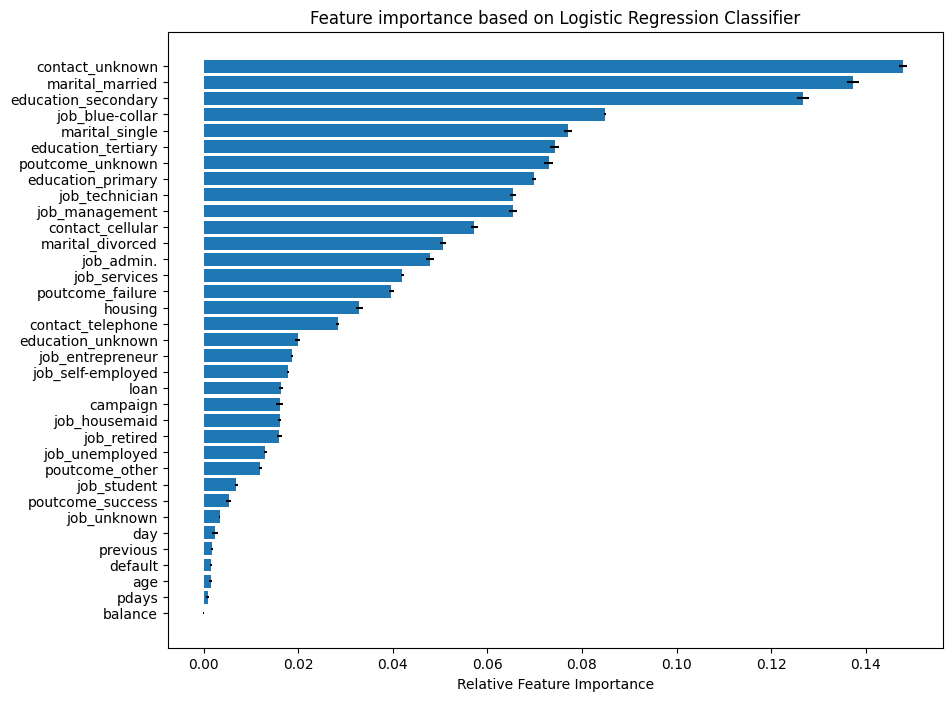

In [74]:
# Finding future importance using model explainability tool
importances = permutation_importance(clf, X_res, y_res, n_jobs=-1, random_state=42)
sorted_idx = importances.importances_mean.argsort()

fig, ax = plt.subplots(figsize=(10, 8))
ax.barh(range(X_res.shape[1]), importances.importances_mean[sorted_idx], xerr=importances.importances_std[sorted_idx], align='center')
ax.set_yticks(range(X_res.shape[1]))
ax.set_yticklabels(X_res.columns[sorted_idx])
ax.set_xlabel('Relative Feature Importance')
plt.title("Feature importance based on Logistic Regression Classifier")
plt.show()


In [75]:
# Listing imporant futures
X_res.columns

Index(['age', 'default', 'balance', 'housing', 'loan', 'day', 'campaign',
       'pdays', 'previous', 'job_admin.', 'job_blue-collar',
       'job_entrepreneur', 'job_housemaid', 'job_management', 'job_retired',
       'job_self-employed', 'job_services', 'job_student', 'job_technician',
       'job_unemployed', 'job_unknown', 'marital_divorced', 'marital_married',
       'marital_single', 'education_primary', 'education_secondary',
       'education_tertiary', 'education_unknown', 'poutcome_failure',
       'poutcome_other', 'poutcome_success', 'poutcome_unknown',
       'contact_cellular', 'contact_telephone', 'contact_unknown'],
      dtype='object')

## ***8.*** ***Future Work (Optional)**

### 1. Save the best performing ml model in a pickle file or joblib file format for deployment process.


In [76]:
# Save the File
import pickle
pickle.dump(clf, open('model_save','wb'))

### 2. Again Load the saved model file and try to predict unseen data for a sanity check.


In [77]:
# Load the File and predict unseen data.
# Load the File and predict unseen data
model = pickle.load(open('/content/model_save','rb'))
model.predict(X_test[:50])
model = pickle.load(open('/content/model_save','rb'))
model.predict(X_res[:500])

array([0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0,
       0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

### ***Congrats! Your model is successfully created and ready for deployment on a live server for a real user interaction !!!***

# **Conclusion**



**From EDA**


*   Most of the clients education are secondary and tertiary, and most clients job categories are blue color, management and technician. Most of the campaign carried out married customers only.
*   May,June, July months campaign are more and december, march, september months very low campaign and Most of the customer contact done by cellular mode. Most of the outcomes are unknown category and very few success.
*   Most of the customers not having personal loan. 55.6 % customers have the housing loan and 44.4 % customers not having housing loan. 98.2 % customers not having credit.
*   Most of the contacts were performed first and second time in the campaign. most of the customers not contacted before the campaign. 11.7 % clients only subscribed the term deposit remaining 88.3% not subcribed. Most of the outcomes are unknown category and very few success. Clients are interested in initial duration of calls 
*   Almost there are no correlation among the independent variables. It is identified that the balance and duration has negative correlation that indicates that the customers who are rich are spending less time on a call. Similarly campaign and duration has also negatively correlated.

**From the ML Model Implementation**

*   The Logistic Regression model performs better than other models such as Decision Tree, Naïve Bayes, K Nearest Neighbours. The Proposed Logistic Regression model have the Accuracy: 81.6 %, Precision :83.86 %, Recall: 78.26 %, F1 Score : 80.96 %, Cohens Kappa Score : 63.2 % and Area Under Curve : 89.98 %. Which are more compared to  aforementioned other models.














VISUALIZING THE EVALUATION METRIC SCORE FOR ALL THE MODELS :-

<module 'matplotlib.pyplot' from '/usr/local/lib/python3.10/dist-packages/matplotlib/pyplot.py'>

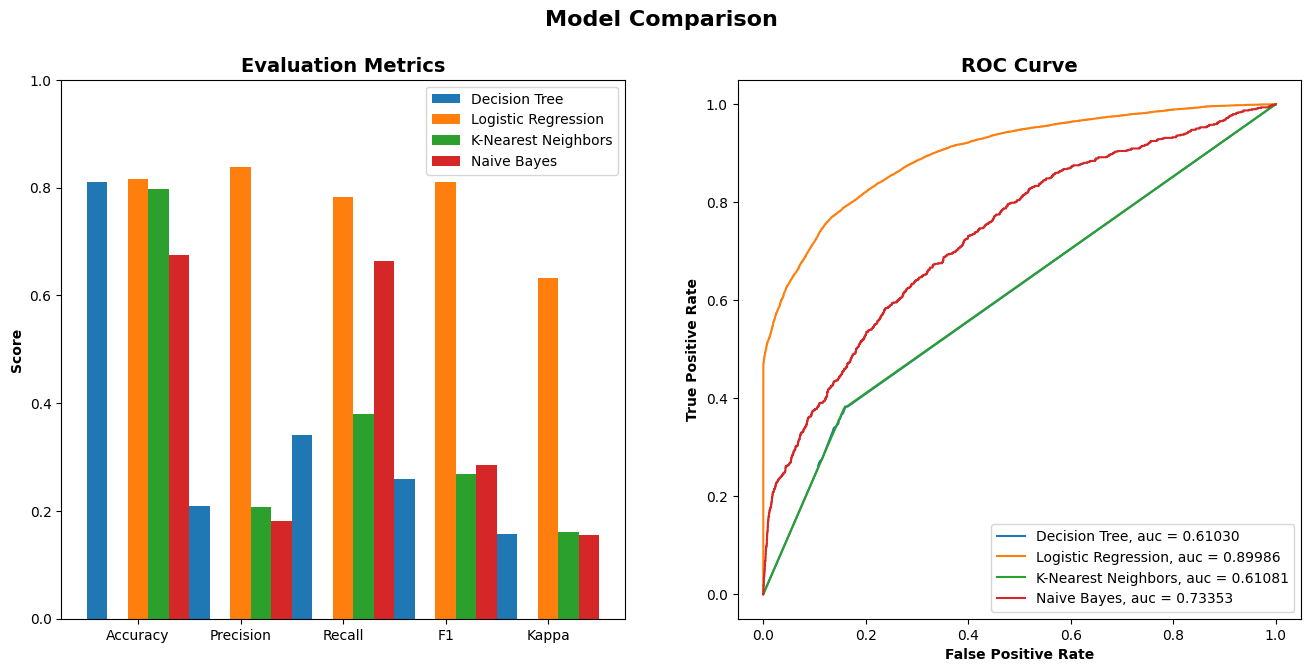

In [80]:
# Create figure with two subplots
fig, axs = plt.subplots(1, 2, figsize=(16, 7))
fig.suptitle('Model Comparison', fontsize=16, fontweight='bold')

# First subplot: Evaluation Metrics
labels = ['Accuracy', 'Precision', 'Recall', 'F1', 'Kappa']
barWidth = 0.2
positions = np.arange(len(labels))

dtc_scores = [dtc_eval['acc'], dtc_eval['prec'], dtc_eval['rec'], dtc_eval['f1'], dtc_eval['kappa']]
clf_scores = [clf_eval['acc'], clf_eval['prec'], clf_eval['rec'], clf_eval['f1'], clf_eval['kappa']]
knn_scores = [knn_eval['acc'], knn_eval['prec'], knn_eval['rec'], knn_eval['f1'], knn_eval['kappa']]
nb_scores = [nb_eval['acc'], nb_eval['prec'], nb_eval['rec'], nb_eval['f1'], nb_eval['kappa']]

axs[0].bar(positions - 2*barWidth, dtc_scores, width=barWidth, label='Decision Tree')
axs[0].bar(positions, clf_scores, width=barWidth, label='Logistic Regression')
axs[0].bar(positions + barWidth, knn_scores, width=barWidth, label='K-Nearest Neighbors')
axs[0].bar(positions + 2*barWidth, nb_scores, width=barWidth, label='Naive Bayes')

axs[0].set_xticks(positions)
axs[0].set_xticklabels(labels)
axs[0].set_ylabel('Score', fontweight='bold')
axs[0].set_ylim(0, 1)
axs[0].set_title('Evaluation Metrics', fontsize=14, fontweight='bold')
axs[0].legend()

# Second subplot: ROC Curve
axs[1].plot(dtc_eval['fpr'], dtc_eval['tpr'], label='Decision Tree, auc = {:0.5f}'.format(dtc_eval['auc']))
axs[1].plot(clf_eval['fpr'], clf_eval['tpr'], label='Logistic Regression, auc = {:0.5f}'.format(clf_eval['auc']))
axs[1].plot(knn_eval['fpr'], knn_eval['tpr'], label='K-Nearest Neighbors, auc = {:0.5f}'.format(knn_eval['auc']))
axs[1].plot(nb_eval['fpr'], nb_eval['tpr'], label='Naive Bayes, auc = {:0.5f}'.format(nb_eval['auc']))

axs[1].set_xlabel('False Positive Rate', fontweight='bold')
axs[1].set_ylabel('True Positive Rate', fontweight='bold')
axs[1].set_title('ROC Curve', fontsize=14, fontweight='bold')
axs[1].legend(loc=4)

plt


 ***Hurrah! You have successfully completed your Machine Learning Capstone Project !!!***